# Script to stack the subsets of the 10k runs

## Author(s): Sven Buder (SB, WG4)

### History:
181022 SB Created

In [47]:
# Preamble for notebook 

# Compatibility with Python 3
from __future__ import (absolute_import, division, print_function)

try:
    %matplotlib inline
    %config InlineBackend.figure_format='retina'
except:
    pass

# Basic packages
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import glob
import pandas
from astropy.table import Table, hstack, vstack

# Matplotlib and associated packages for plotting
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.transforms import Bbox,TransformedBbox
from matplotlib.image import BboxImage
from matplotlib.legend_handler import HandlerBase
from matplotlib._png import read_png
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors

params = {
    'font.family'        : 'sans',
    'font.size'          : 17,
    'axes.labelsize'     : 20,
    'ytick.labelsize'    : 16,
    'xtick.labelsize'    : 16,
    'legend.fontsize'    : 20,
    'text.usetex'        : True, 
    'text.latex.preamble': [r'\usepackage{upgreek}', r'\usepackage{amsmath}'],
    }   
plt.rcParams.update(params)

_parula_data = [[0.2081, 0.1663, 0.5292], 
                [0.2116238095, 0.1897809524, 0.5776761905], 
                [0.212252381, 0.2137714286, 0.6269714286], 
                [0.2081, 0.2386, 0.6770857143], 
                [0.1959047619, 0.2644571429, 0.7279], 
                [0.1707285714, 0.2919380952, 0.779247619], 
                [0.1252714286, 0.3242428571, 0.8302714286], 
                [0.0591333333, 0.3598333333, 0.8683333333], 
                [0.0116952381, 0.3875095238, 0.8819571429], 
                [0.0059571429, 0.4086142857, 0.8828428571], 
                [0.0165142857, 0.4266, 0.8786333333], 
                [0.032852381, 0.4430428571, 0.8719571429], 
                [0.0498142857, 0.4585714286, 0.8640571429], 
                [0.0629333333, 0.4736904762, 0.8554380952], 
                [0.0722666667, 0.4886666667, 0.8467], 
                [0.0779428571, 0.5039857143, 0.8383714286], 
                [0.079347619, 0.5200238095, 0.8311809524], 
                [0.0749428571, 0.5375428571, 0.8262714286], 
                [0.0640571429, 0.5569857143, 0.8239571429], 
                [0.0487714286, 0.5772238095, 0.8228285714], 
                [0.0343428571, 0.5965809524, 0.819852381], 
                [0.0265, 0.6137, 0.8135], 
                [0.0238904762, 0.6286619048, 0.8037619048], 
                [0.0230904762, 0.6417857143, 0.7912666667], 
                [0.0227714286, 0.6534857143, 0.7767571429], 
                [0.0266619048, 0.6641952381, 0.7607190476], 
                [0.0383714286, 0.6742714286, 0.743552381], 
                [0.0589714286, 0.6837571429, 0.7253857143], 
                [0.0843, 0.6928333333, 0.7061666667], 
                [0.1132952381, 0.7015, 0.6858571429], 
                [0.1452714286, 0.7097571429, 0.6646285714], 
                [0.1801333333, 0.7176571429, 0.6424333333], 
                [0.2178285714, 0.7250428571, 0.6192619048], 
                [0.2586428571, 0.7317142857, 0.5954285714], 
                [0.3021714286, 0.7376047619, 0.5711857143], 
                [0.3481666667, 0.7424333333, 0.5472666667], 
                [0.3952571429, 0.7459, 0.5244428571], 
                [0.4420095238, 0.7480809524, 0.5033142857], 
                [0.4871238095, 0.7490619048, 0.4839761905], 
                [0.5300285714, 0.7491142857, 0.4661142857], 
                [0.5708571429, 0.7485190476, 0.4493904762],
                [0.609852381, 0.7473142857, 0.4336857143], 
                [0.6473, 0.7456, 0.4188], 
                [0.6834190476, 0.7434761905, 0.4044333333], 
                [0.7184095238, 0.7411333333, 0.3904761905], 
                [0.7524857143, 0.7384, 0.3768142857], 
                [0.7858428571, 0.7355666667, 0.3632714286], 
                [0.8185047619, 0.7327333333, 0.3497904762], 
                [0.8506571429, 0.7299, 0.3360285714], 
                [0.8824333333, 0.7274333333, 0.3217], 
                [0.9139333333, 0.7257857143, 0.3062761905], 
                [0.9449571429, 0.7261142857, 0.2886428571], 
                [0.9738952381, 0.7313952381, 0.266647619], 
                [0.9937714286, 0.7454571429, 0.240347619], 
                [0.9990428571, 0.7653142857, 0.2164142857], 
                [0.9955333333, 0.7860571429, 0.196652381], 
                [0.988, 0.8066, 0.1793666667], 
                [0.9788571429, 0.8271428571, 0.1633142857], 
                [0.9697, 0.8481380952, 0.147452381], 
                [0.9625857143, 0.8705142857, 0.1309], 
                [0.9588714286, 0.8949, 0.1132428571], 
                [0.9598238095, 0.9218333333, 0.0948380952], 
                [0.9661, 0.9514428571, 0.0755333333], 
                [0.9763, 0.9831, 0.0538]]

parula = ListedColormap(_parula_data, name='parula')
parula_zero = _parula_data[0]
parula_0 = ListedColormap(_parula_data, name='parula_0')
parula_0.set_bad((1,1,1))
parula_r = ListedColormap(_parula_data[::-1], name='parula_r')

willi_blau = [0.0722666667, 0.4886666667, 0.8467]

In [48]:
subsets = []
subsets_abund = []
for each_subset in range(0,66):
    if glob.glob('GALAH_iDR3_10k_'+str(each_subset)+'.fits') != []:
        subsets.append('GALAH_iDR3_10k_'+str(each_subset)+'.fits')
        subsets_abund.append('GALAH_iDR3_10k_'+str(each_subset)+'_abund.fits')

subsets = np.array(subsets)
subsets_abund = np.array(subsets_abund)

len_subsets = len(subsets)
print(len_subsets)
subsets,subsets_abund

66


(array(['GALAH_iDR3_10k_0.fits', 'GALAH_iDR3_10k_1.fits',
        'GALAH_iDR3_10k_2.fits', 'GALAH_iDR3_10k_3.fits',
        'GALAH_iDR3_10k_4.fits', 'GALAH_iDR3_10k_5.fits',
        'GALAH_iDR3_10k_6.fits', 'GALAH_iDR3_10k_7.fits',
        'GALAH_iDR3_10k_8.fits', 'GALAH_iDR3_10k_9.fits',
        'GALAH_iDR3_10k_10.fits', 'GALAH_iDR3_10k_11.fits',
        'GALAH_iDR3_10k_12.fits', 'GALAH_iDR3_10k_13.fits',
        'GALAH_iDR3_10k_14.fits', 'GALAH_iDR3_10k_15.fits',
        'GALAH_iDR3_10k_16.fits', 'GALAH_iDR3_10k_17.fits',
        'GALAH_iDR3_10k_18.fits', 'GALAH_iDR3_10k_19.fits',
        'GALAH_iDR3_10k_20.fits', 'GALAH_iDR3_10k_21.fits',
        'GALAH_iDR3_10k_22.fits', 'GALAH_iDR3_10k_23.fits',
        'GALAH_iDR3_10k_24.fits', 'GALAH_iDR3_10k_25.fits',
        'GALAH_iDR3_10k_26.fits', 'GALAH_iDR3_10k_27.fits',
        'GALAH_iDR3_10k_28.fits', 'GALAH_iDR3_10k_29.fits',
        'GALAH_iDR3_10k_30.fits', 'GALAH_iDR3_10k_31.fits',
        'GALAH_iDR3_10k_32.fits', 'GALAH_iDR3_10k_

In [49]:
joined_subsets = Table.read(subsets[0], format='fits')
for each_other_subset in subsets[1:]:
    joined_subsets = vstack([joined_subsets, Table.read(each_other_subset, format='fits')])
    
joined_subsets_abund = Table.read(subsets_abund[0], format='fits')
for each_other_subset in subsets_abund[1:]:
    joined_subsets_abund = vstack([joined_subsets_abund, Table.read(each_other_subset, format='fits')])

In [50]:
joined_subsets.write('../data_products/GALAH_iDR3_combined_10k.fits',overwrite=True)
joined_subsets_abund.write('../data_products/GALAH_iDR3_combined_10k_abund.fits',overwrite=True)

# SUBSET SELECTION:

abs(e_teff) >0 & teff > 3000 & abs(4069 - teff) > 2 & abs(3748 - teff) > 4 & abs(5000 - teff) > 2 & abs(5250 - teff) > 2 & abs(5500 - teff) > 2 & abs(5750 - teff) > 2 & abs(6000 - teff) > 2 & abs(6250 - teff) > 2 & abs(6500 - teff) > 2 & abs(6750 - teff) > 2 & abs(7000 - teff) > 2 & abs(7250 - teff) > 2  & abs(7500 - teff) > 2  & abs(7750 - teff) > 2 & abs(8000 - teff) > 2 & (abs(logg - 4.21) > 0.012 | teff > 4500) 

In [51]:
good = (
    (np.abs(joined_subsets['e_teff']) > 0) & 
    (joined_subsets['vbroad'] < 50) & 
    (joined_subsets['snr_c2_iraf'] > 10) &
    (joined_subsets['parallax_error'] / joined_subsets['parallax'] < 0.5) &
    (joined_subsets['ruwe'] < 1.4) &
    (np.abs(4069 - joined_subsets['teff']) > 2) & 
    (np.abs(3748 - joined_subsets['teff']) > 4) & 
    (np.abs(5250 - joined_subsets['teff']) > 2) & 
    (np.abs(5500 - joined_subsets['teff']) > 2) & 
    (np.abs(5750 - joined_subsets['teff']) > 2) & 
    (np.abs(6000 - joined_subsets['teff']) > 2) & 
    (np.abs(6250 - joined_subsets['teff']) > 2) & 
    (np.abs(6500 - joined_subsets['teff']) > 2) & 
    (np.abs(6750 - joined_subsets['teff']) > 2) & 
    (np.abs(7000 - joined_subsets['teff']) > 2) & 
    (np.abs(7250 - joined_subsets['teff']) > 2) & 
    (np.abs(7500 - joined_subsets['teff']) > 2) & 
    (np.abs(7750 - joined_subsets['teff']) > 2) & 
    (np.abs(8000 - joined_subsets['teff']) > 2) & 
    ((np.abs(joined_subsets['logg'] - 4.21) > 0.012) | (joined_subsets['teff'] > 4500))
    )

In [52]:
def plot_density(x, y, bins=100, range=None, normed=False, weights=None, 
                 scaling=None, reduce_fn='sum', smooth=0, ax=None, cmin=0, **kwargs):
    """
    Compute the bi-dimensional histogram of two data samples.

    Parameters
    ----------
    x : array_like, shape (N,)
        An array containing the x coordinates of the points to be
        histogrammed.
    y : array_like, shape (N,)
        An array containing the y coordinates of the points to be
        histogrammed.
    bins : int or array_like or [int, int] or [array, array], optional
        The bin specification:

        * If int, the number of bins for the two dimensions (nx=ny=bins).
        * If array_like, the bin edges for the two dimensions
            (x_edges=y_edges=bins).
        * If [int, int], the number of bins in each dimension
            (nx, ny = bins).
        * If [array, array], the bin edges in each dimension
            (x_edges, y_edges = bins).
        * A combination [int, array] or [array, int], where int
            is the number of bins and array is the bin edges.

    range : array_like, shape(2,2), optional
        The leftmost and rightmost edges of the bins along each dimension
        (if not specified explicitly in the `bins` parameters):
        ``[[xmin, xmax], [ymin, ymax]]``. All values outside of this range
        will be considered outliers and not tallied in the histogram.
    normed : bool, optional
        If False, returns the number of samples in each bin. If True,
        returns the bin density ``bin_count / sample_count / bin_area``.
    weights : array_like, shape(N,), optional
        An array of values ``w_i`` weighing each sample ``(x_i, y_i)``.
        Weights are normalized to 1 if `normed` is True. If `normed` is
        False, the values of the returned histogram are equal to the sum of
        the weights belonging to the samples falling into each bin.
    """
    import pylab as plt
    from scipy.ndimage import gaussian_filter

    ind = (np.isfinite(x) & np.isfinite(y))
    if False in ind:
        print("Warning: Not all values are finite.")
        w = weights
        if w is not None:
            w = w[ind]
        n, bx, by = plt.histogram2d(x[ind], y[ind], bins=bins, range=range, normed=normed,
                                    weights=w)
    else:
        n, bx, by = plt.histogram2d(x, y, bins=bins, range=range, normed=normed,
                                    weights=weights)

    if reduce_fn.lower() in ('average', 'mean', 'avg'):
        n0, _, _ = plt.histogram2d(x, y, bins=bins, range=range, normed=normed,
                                   weights=None)
        
        cmin_limit = (n0 < cmin)
        ind = n0 > 0
        n = n.astype(float)
        n[ind] /= n0[ind].astype(float)
    n[(n==0)] = np.nan
    n[cmin_limit] = np.nan

    defaults = dict(zorder = 1, cmap='RdYlBu_r', origin='lower', aspect='auto',
                    interpolation='nearest')
    defaults.update(**kwargs)
    extent = (bx[0], bx[-1], by[0], by[-1])

    if smooth > 0:
        gaussian_filter(n, smooth, output=n)

    if ax==None:
        ax = plt.gca()
    else:
        ax=ax
        
    if scaling is None:
        scaling = 'None'
    s = scaling.lower().replace(' ', '')
    if s in (None, 'none', 'count'):
        return ax.imshow(n.T, extent=extent, **defaults)#, n
    else:
        if s in ('log', 'log(n)', 'log10', 'log(count)'):
            return ax.imshow(np.log10(n).T, extent=extent, **defaults)#, np.log10(n)
        elif s in ('log(n+1)', 'log(count+1)'):
            return ax.imshow(np.log10(n + 1).T, extent=extent, **defaults)#, np.log10(n + 1)

In [53]:
# Get MARCS grid edges

# import scipy
# from scipy import io
# marcs = scipy.io.readsav('../../trunk/sme_536/atmospheres/marcs2014.sav')

# marcs_gridedge = []
# for each_teff in np.unique(marcs.atmo_grid['TEFF']):
#     sub = (marcs.atmo_grid['TEFF'] == each_teff)
#     marcs_gridedge.append([each_teff, np.min(marcs.atmo_grid['LOGG'][sub])])
# for each_teff in np.unique(marcs.atmo_grid['TEFF']):
#     sub = (marcs.atmo_grid['TEFF'] == each_teff)
#     marcs_gridedge.append([each_teff, np.max(marcs.atmo_grid['LOGG'][sub])])
    
# marcs_gridedge = np.array(marcs_gridedge)

marcs_gridedge = np.array([[  2.50000000e+03,  -5.00000000e-01],
       [  2.60000000e+03,  -5.00000000e-01],
       [  2.70000000e+03,  -5.00000000e-01],
       [  2.80000000e+03,  -5.00000000e-01],
       [  2.80000000e+03,   0.00000000e+00],
       [  2.90000000e+03,   0.00000000e+00],                           
       [  3.00000000e+03,   0.00000000e+00],                           
       [  3.00000000e+03,   5.00000000e-01],                           
       [  3.10000000e+03,   5.00000000e-01],                           
       [  3.20000000e+03,   5.00000000e-01],
       [  3.20000000e+03,   0.00000000e+00],
       [  3.30000000e+03,   0.00000000e+00],
       [  3.30000000e+03,  -5.00000000e-01],
       [  3.40000000e+03,  -5.00000000e-01],
       [  3.50000000e+03,  -5.00000000e-01],
       [  3.60000000e+03,  -5.00000000e-01],
       [  3.70000000e+03,  -5.00000000e-01],
       [  3.80000000e+03,  -5.00000000e-01],
       [  3.90000000e+03,  -5.00000000e-01],
       [  4.00000000e+03,  -5.00000000e-01],
       [  4.25000000e+03,  -5.00000000e-01],
       [  4.25000000e+03,   0.00000000e+00],
       [  4.50000000e+03,   0.00000000e+00],
       [  4.75000000e+03,   0.00000000e+00],
       [  5.00000000e+03,   0.00000000e+00],
       [  5.25000000e+03,   0.00000000e+00],
       [  5.25000000e+03,   5.00000000e-01],
       [  5.50000000e+03,   5.00000000e-01],
       [  5.75000000e+03,   5.00000000e-01],
       [  6.00000000e+03,   5.00000000e-01],
       [  6.00000000e+03,   1.00000000e+00],
       [  6.25000000e+03,   1.00000000e+00],
       [  6.50000000e+03,   1.00000000e+00],
       [  6.75000000e+03,   1.00000000e+00],
       [  6.75000000e+03,   1.50000000e+00],
       [  7.00000000e+03,   1.50000000e+00],
       [  7.25000000e+03,   1.50000000e+00],
       [  7.50000000e+03,   1.50000000e+00],
       [  7.50000000e+03,   2.00000000e+00],
       [  7.75000000e+03,   2.00000000e+00],
       [  8.00000000e+03,   2.00000000e+00],
       [  8.00000000e+03,   5.00000000e+00],
       [  3.90000000e+03,   5.00000000e+00],
       [  3.90000000e+03,   5.50000000e+00],
       [  2.50000000e+03,   5.50000000e+00]])

In [54]:
# # Get Parsec isochrones

# from ezpadova import cmd

# iso_5_m20 = cmd.get_one_isochrone(age = 5*10**9, metal=10**(-2.0)*0.0152)
# iso_5_m10 = cmd.get_one_isochrone(age = 5*10**9, metal=10**(-1.0)*0.0152)
# iso_5_m05 = cmd.get_one_isochrone(age = 5*10**9, metal=10**(-0.5)*0.0152)
# iso_5_p00 = cmd.get_one_isochrone(age = 5*10**9, metal=10**(+0.0)*0.0152)
# iso_5_p05 = cmd.get_one_isochrone(age = 5*10**9, metal=10**(+0.5)*0.0152)

# iso_1_m20 = cmd.get_one_isochrone(age = 1*10**9, metal=10**(-2.0)*0.0152)
# iso_1_m10 = cmd.get_one_isochrone(age = 1*10**9, metal=10**(-1.0)*0.0152)
# iso_1_m05 = cmd.get_one_isochrone(age = 1*10**9, metal=10**(-0.5)*0.0152)
# iso_1_p00 = cmd.get_one_isochrone(age = 1*10**9, metal=10**(+0.0)*0.0152)
# iso_1_p05 = cmd.get_one_isochrone(age = 1*10**9, metal=10**(+0.5)*0.0152)

# iso_10_m20 = cmd.get_one_isochrone(age = 10*10**9, metal=10**(-2.0)*0.0152)
# iso_10_m10 = cmd.get_one_isochrone(age = 10*10**9, metal=10**(-1.0)*0.0152)
# iso_10_m05 = cmd.get_one_isochrone(age = 10*10**9, metal=10**(-0.5)*0.0152)
# iso_10_p00 = cmd.get_one_isochrone(age = 10*10**9, metal=10**(+0.0)*0.0152)
# iso_10_p05 = cmd.get_one_isochrone(age = 10*10**9, metal=10**(+0.5)*0.0152)

# iso_13_m20 = cmd.get_one_isochrone(age = 13.5*10**9, metal=10**(-2.0)*0.0152)
# iso_13_m10 = cmd.get_one_isochrone(age = 13.5*10**9, metal=10**(-1.0)*0.0152)
# iso_13_m05 = cmd.get_one_isochrone(age = 13.5*10**9, metal=10**(-0.5)*0.0152)
# iso_13_p00 = cmd.get_one_isochrone(age = 13.5*10**9, metal=10**(+0.0)*0.0152)
# iso_13_p05 = cmd.get_one_isochrone(age = 13.5*10**9, metal=10**(+0.5)*0.0152)

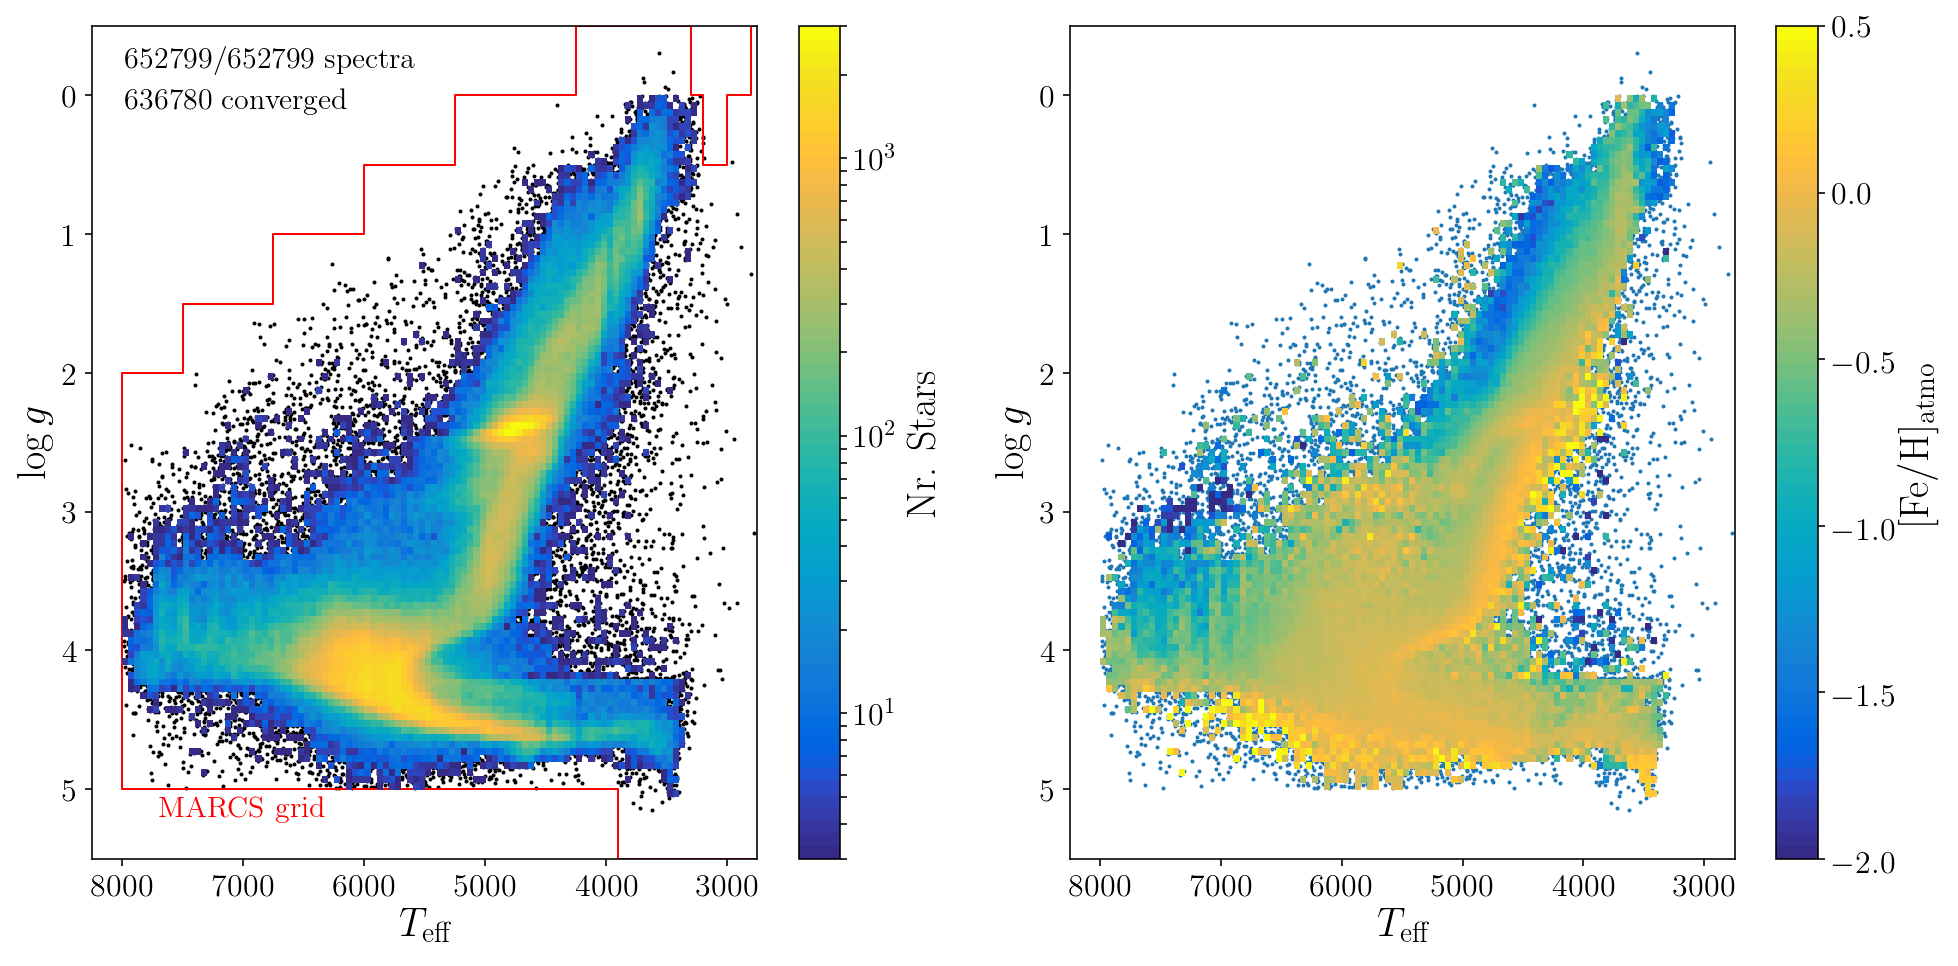

In [55]:
def plot_kiel(data, isochrones = False, cmin = 3, vmax = 3*10**3, teff = (2750, 8250, 50), logg = (-0.5, 5.5, 0.05), feh = (-2, 0.5)):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize = (14,7))
    
    marcs_kwargs = dict(
        c = 'r',
        lw = 1
    )
    
    ax1.plot(marcs_gridedge[:,0],marcs_gridedge[:,1],**marcs_kwargs)
    ax1.text(0.1,0.05,'MARCS grid',transform=ax1.transAxes, color='r', fontsize=15)

    ax1.text(0.05,0.95,str(len(joined_subsets['teff']))+'/652799 spectra',transform=ax1.transAxes, color='k', fontsize=15, ha='left')
    ax1.text(0.05,0.9,str(len(data['teff']))+' converged',transform=ax1.transAxes, color='k', fontsize=15,ha='left')
    
    hist_scatter = dict(
        s = 1,
        c = 'k',
        zorder = 1,
        rasterized = True
    )
    
    ax1.scatter(
        data['teff'],
        data['logg'],
        **hist_scatter
    )
    
    hist_kwargs_density = dict(
        cmap = parula,
        cmin = cmin,
        bins = (
            np.arange(teff[0],teff[1] + teff[2], teff[2]),
            np.arange(logg[0],logg[1] + logg[2], logg[2])
        ),
        vmin=cmin, vmax=vmax,
        rasterized = True,
        norm=LogNorm()
    )
    
    p1, x1, y1, s1 = ax1.hist2d(
        data['teff'],
        data['logg'],
        zorder=2,
        **hist_kwargs_density
    )
    
    ax1.set_xlim(teff[1],teff[0])
    ax1.set_xlabel(r'$T_\text{eff}$')
    ax1.set_ylim(logg[1],logg[0])
    ax1.set_ylabel(r'$\log g$')
    c1 = plt.colorbar(s1, ax=ax1)
    c1.set_label('Nr. Stars')
    
    #######

    hist_scatter = dict(
        s = 1,
        cmap = parula,
        zorder = 1,
        vmin = feh[0], vmax=feh[1],
        rasterized = True
    )
    
    ax2.scatter(
        data['teff'],
        data['logg'],
        **hist_scatter
    )
    
    hist_kwargs_mean_value = dict(
        reduce_fn='mean',
        bins = (
            np.arange(teff[0],teff[1]+teff[2],teff[2]),
            np.arange(logg[0],logg[1]+logg[2],logg[2])
        ),
        vmin=feh[0],vmax=feh[1],
        cmap = parula,
        cmin = cmin,
        rasterized = True,
        zorder=2
    )
    
    s2 = plot_density(
        data['teff'],
        data['logg'],
        weights = data['fe_h_atmo'],
        ax = ax2,
        **hist_kwargs_mean_value
        )

    ax2.set_xlim(teff[1],teff[0])
    ax2.set_xlabel(r'$T_\text{eff}$')
    ax2.set_ylim(logg[1],logg[0])
    ax2.set_ylabel(r'$\log g$')
    c2 = plt.colorbar(s2, ax=ax2)
    c2.set_label(r'$\mathrm{[Fe/H]_\text{atmo}}$')
    
    if isochrones == True:
        iso_kwargs = dict(c='k',zorder=3)
        ax2.plot(
            10**iso_5_m20['logT'],
            iso_5_m20['logG'],
            **iso_kwargs
        )
        ax2.plot(
            10**iso_5_m10['logT'],
            iso_5_m10['logG'],
            **iso_kwargs
        )
        ax2.plot(
            10**iso_5_m05['logT'],
            iso_5_m05['logG'],
            **iso_kwargs
        )
        ax2.plot(
            10**iso_5_p00['logT'],
            iso_5_p00['logG'],
            **iso_kwargs
        )
        ax2.plot(
            10**iso_5_p05['logT'],
            iso_5_p05['logG'],
            **iso_kwargs
        )

        iso_kwargs = dict(c='k',zorder=3,ls='dashed')
        ax2.plot(
            10**iso_1_m20['logT'],
            iso_1_m20['logG'],
            **iso_kwargs
        )
        ax2.plot(
            10**iso_1_m10['logT'],
            iso_1_m10['logG'],
            **iso_kwargs
        )
        ax2.plot(
            10**iso_1_m05['logT'],
            iso_1_m05['logG'],
            **iso_kwargs
        )
        ax2.plot(
            10**iso_1_p00['logT'],
            iso_1_p00['logG'],
            **iso_kwargs
        )
        ax2.plot(
            10**iso_1_p05['logT'],
            iso_1_p05['logG'],
            **iso_kwargs
        )

        iso_kwargs = dict(c='k',zorder=3,ls='dotted')
        ax2.plot(
            10**iso_10_m20['logT'],
            iso_10_m20['logG'],
            **iso_kwargs
        )
        ax2.plot(
            10**iso_10_m10['logT'],
            iso_10_m10['logG'],
            **iso_kwargs
        )
        ax2.plot(
            10**iso_10_m05['logT'],
            iso_10_m05['logG'],
            **iso_kwargs
        )
        ax2.plot(
            10**iso_10_p00['logT'],
            iso_10_p00['logG'],
            **iso_kwargs
        )
        ax2.plot(
            10**iso_10_p05['logT'],
            iso_10_p05['logG'],
            **iso_kwargs
        )

        iso_kwargs = dict(c='k',zorder=3,ls='dotted')
        ax2.plot(
            10**iso_13_m20['logT'],
            iso_13_m20['logG'],
            **iso_kwargs
        )
        ax2.plot(
            10**iso_13_m10['logT'],
            iso_13_m10['logG'],
            **iso_kwargs
        )
        ax2.plot(
            10**iso_13_m05['logT'],
            iso_13_m05['logG'],
            **iso_kwargs
        )
        ax2.plot(
            10**iso_13_p00['logT'],
            iso_13_p00['logG'],
            **iso_kwargs
        )
        ax2.plot(
            10**iso_13_p05['logT'],
            iso_13_p05['logG'],
            **iso_kwargs
        )

    plt.tight_layout()
    return f

kiel_plot = plot_kiel(joined_subsets[(joined_subsets['e_teff'] > 0)])
kiel_plot.savefig('../figures/Kiel_Diagram_GALAH_'+str(len_subsets)+'_65.pdf', dpi=300, bbox_inches = 'tight')

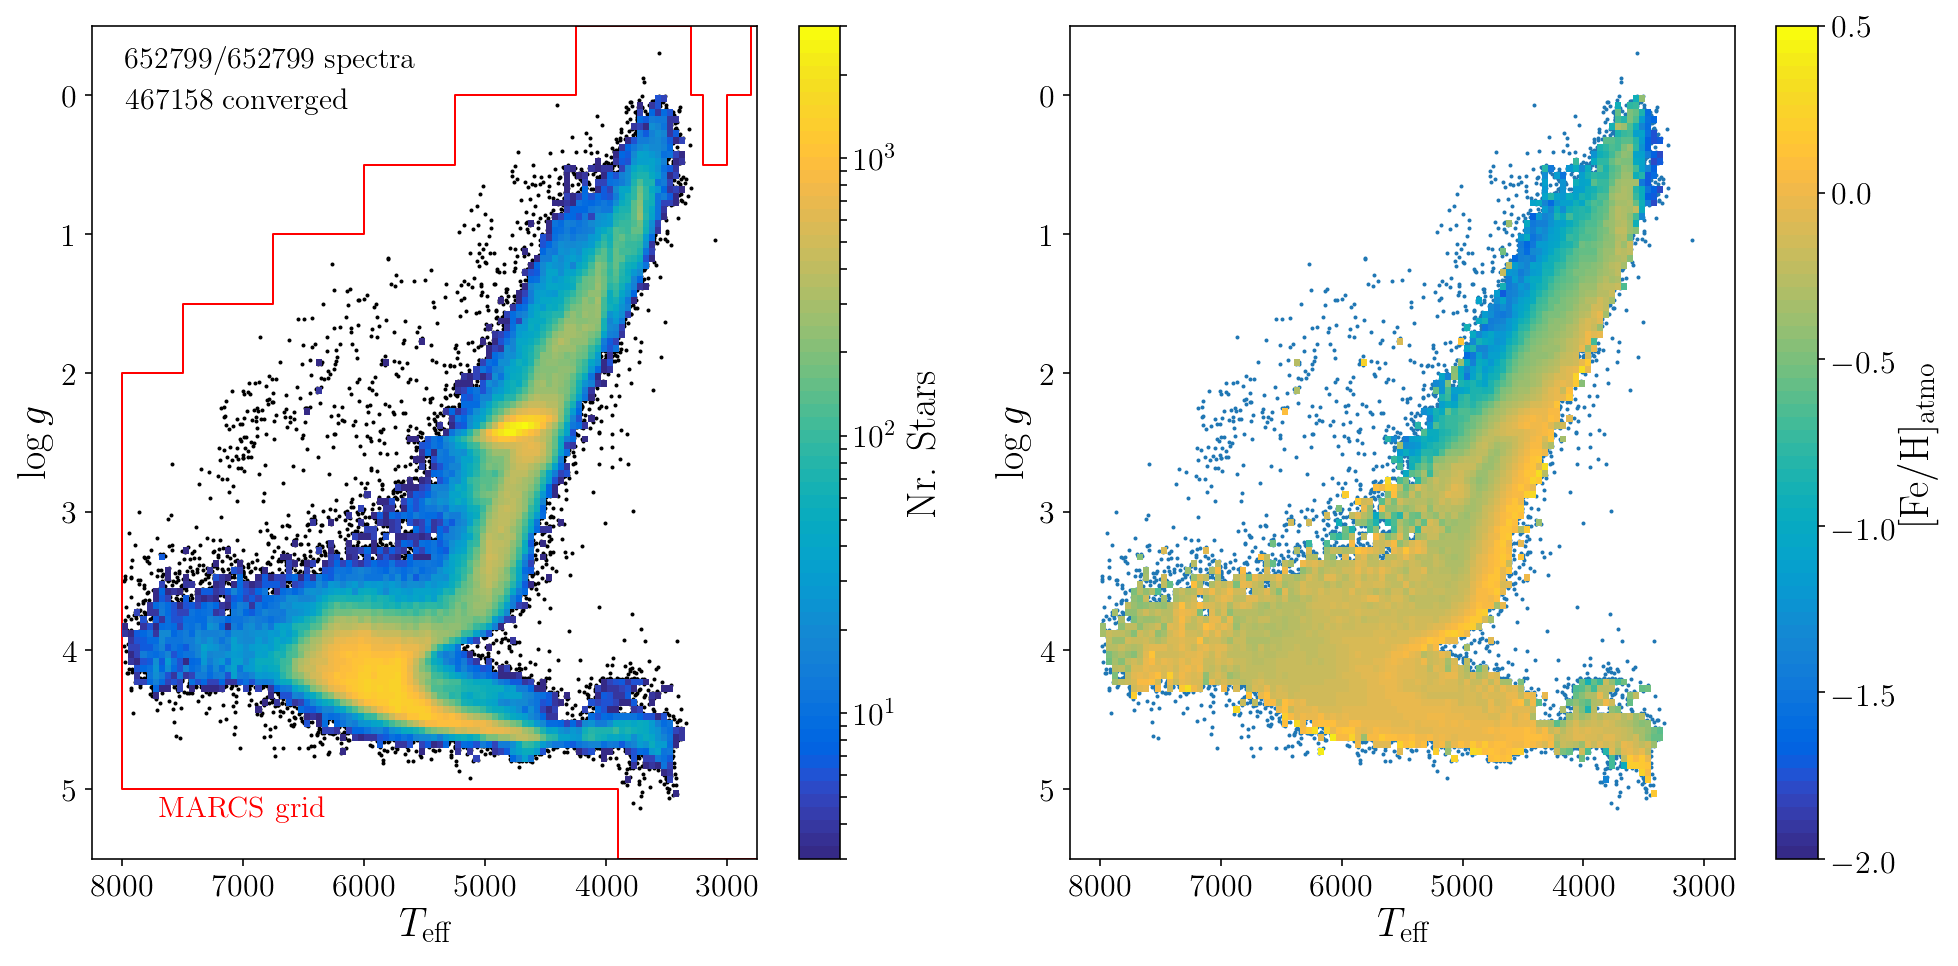

In [56]:
kiel_plot = plot_kiel(joined_subsets[(joined_subsets['flag_sp'] == 0)])
kiel_plot.savefig('../figures/Kiel_Diagram_GALAH_flag_0.pdf', dpi=300, bbox_inches = 'tight')

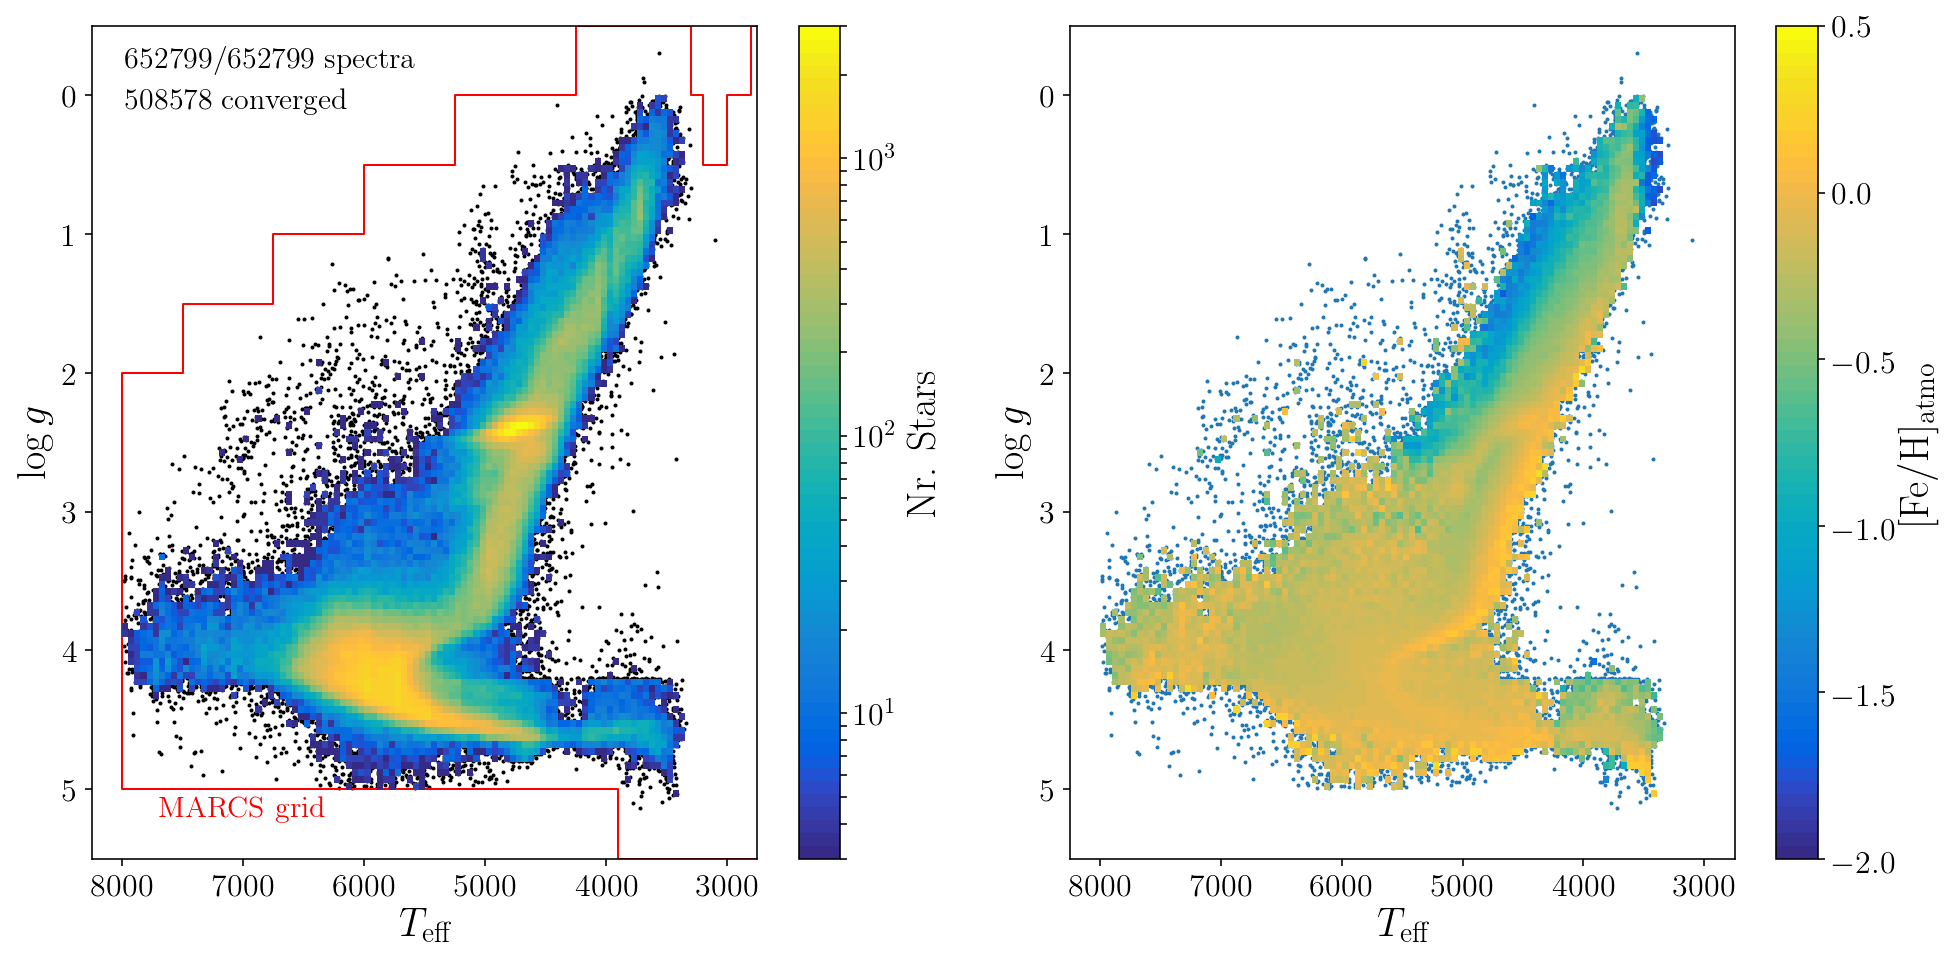

In [57]:
kiel_plot = plot_kiel(joined_subsets[(joined_subsets['flag_sp'] <= 1)])
kiel_plot.savefig('../figures/Kiel_Diagram_GALAH_flag_1.pdf', dpi=300, bbox_inches = 'tight')

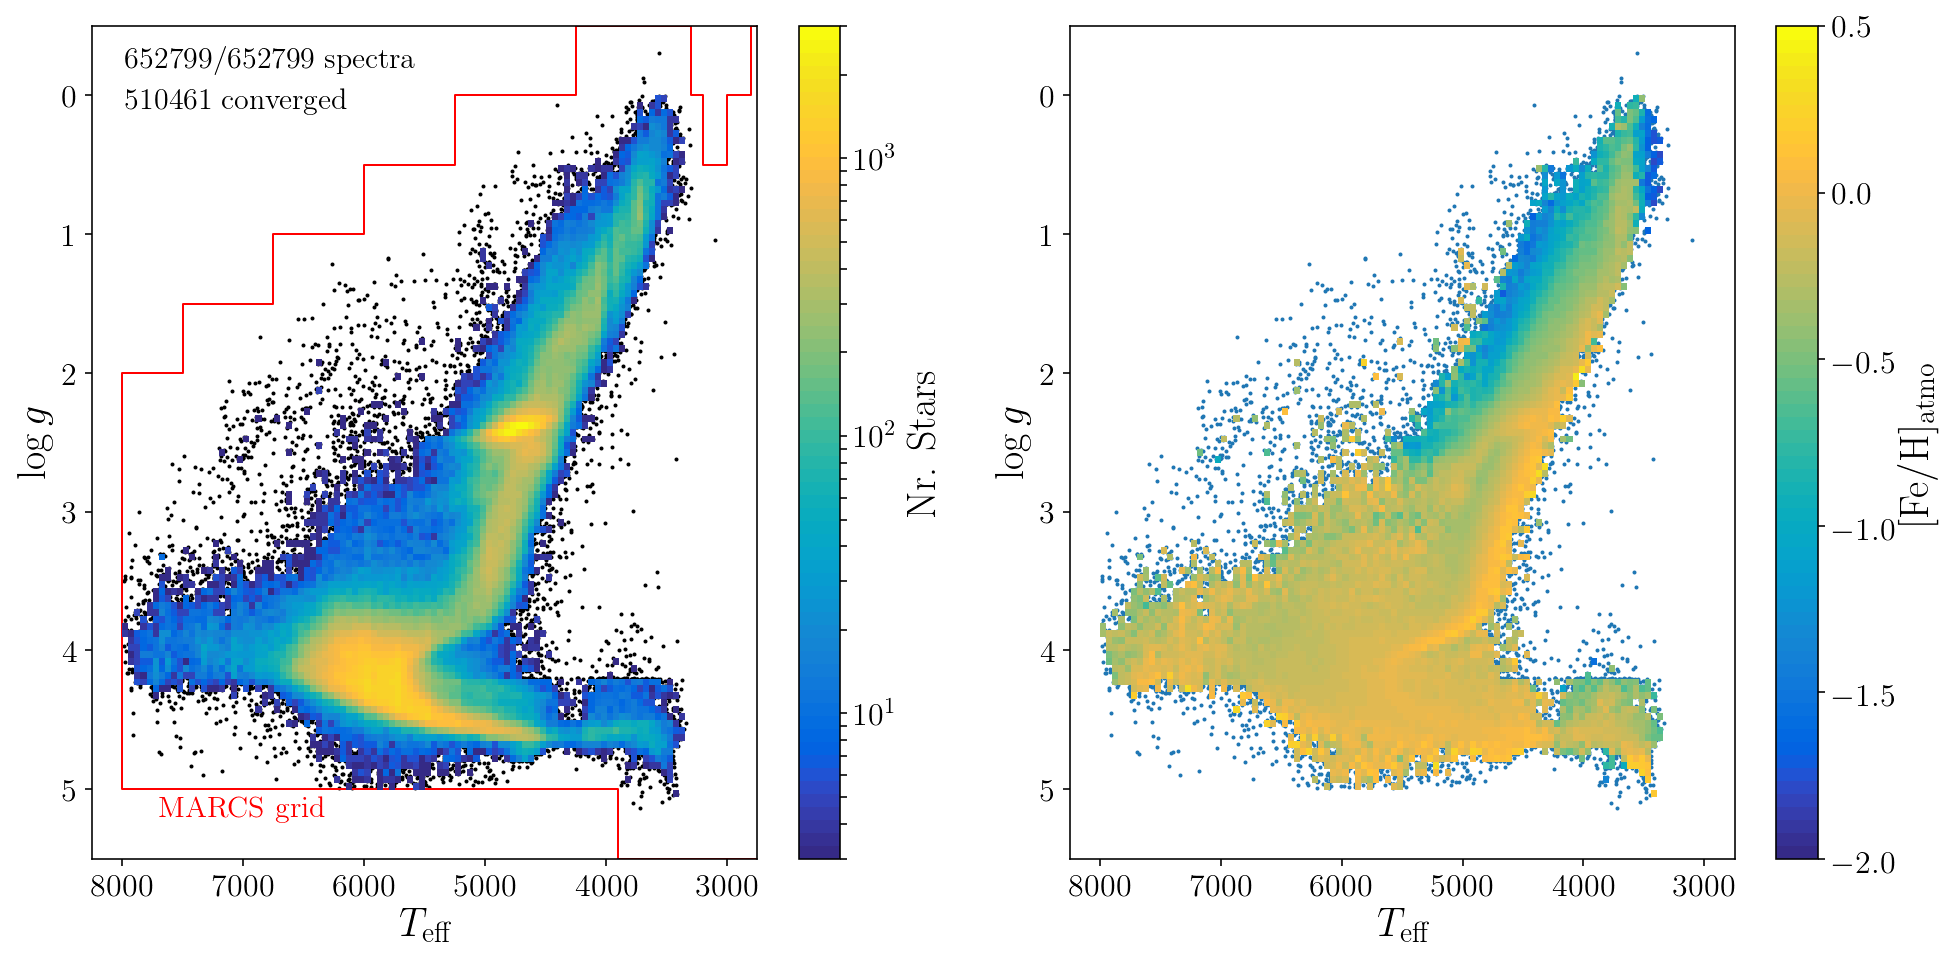

In [58]:
kiel_plot = plot_kiel(joined_subsets[(joined_subsets['flag_sp'] <= 3)])
kiel_plot.savefig('../figures/Kiel_Diagram_GALAH_flag_12.pdf', dpi=300, bbox_inches = 'tight')

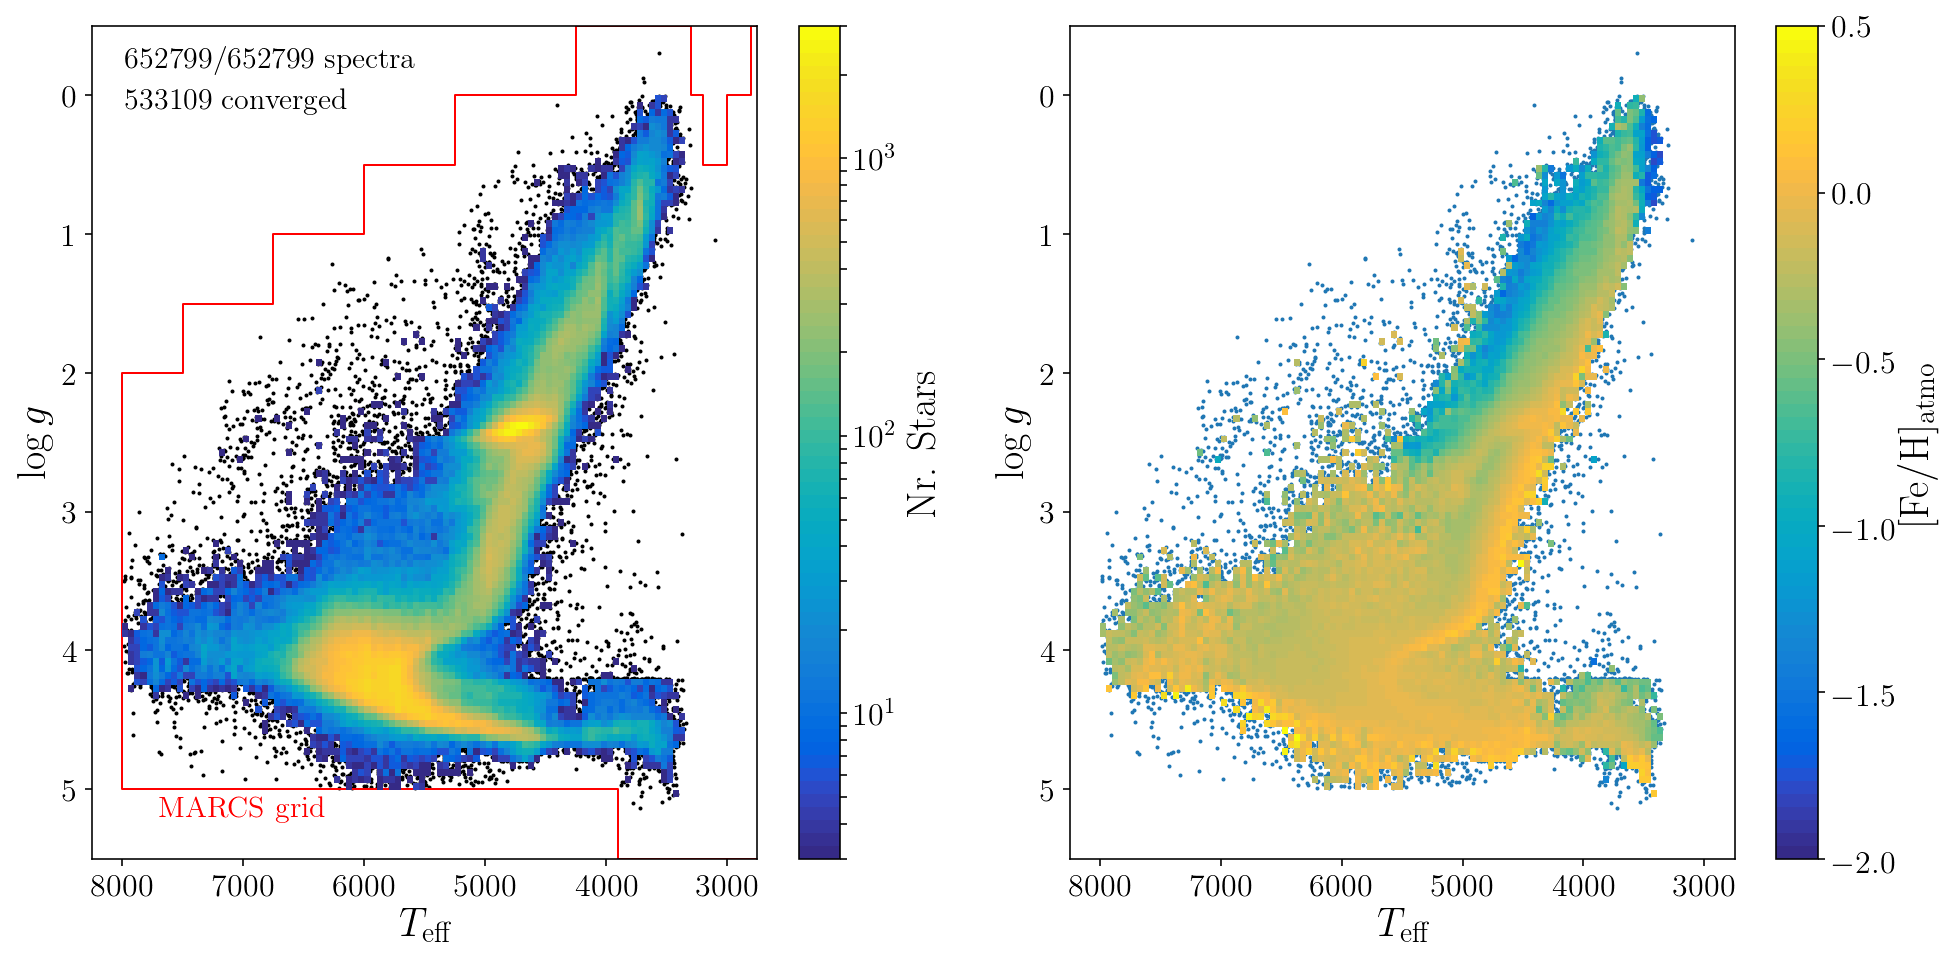

In [59]:
kiel_plot = plot_kiel(joined_subsets[(joined_subsets['flag_sp'] <= 8-1)])
kiel_plot.savefig('../figures/Kiel_Diagram_GALAH_flag_124.pdf', dpi=300, bbox_inches = 'tight')

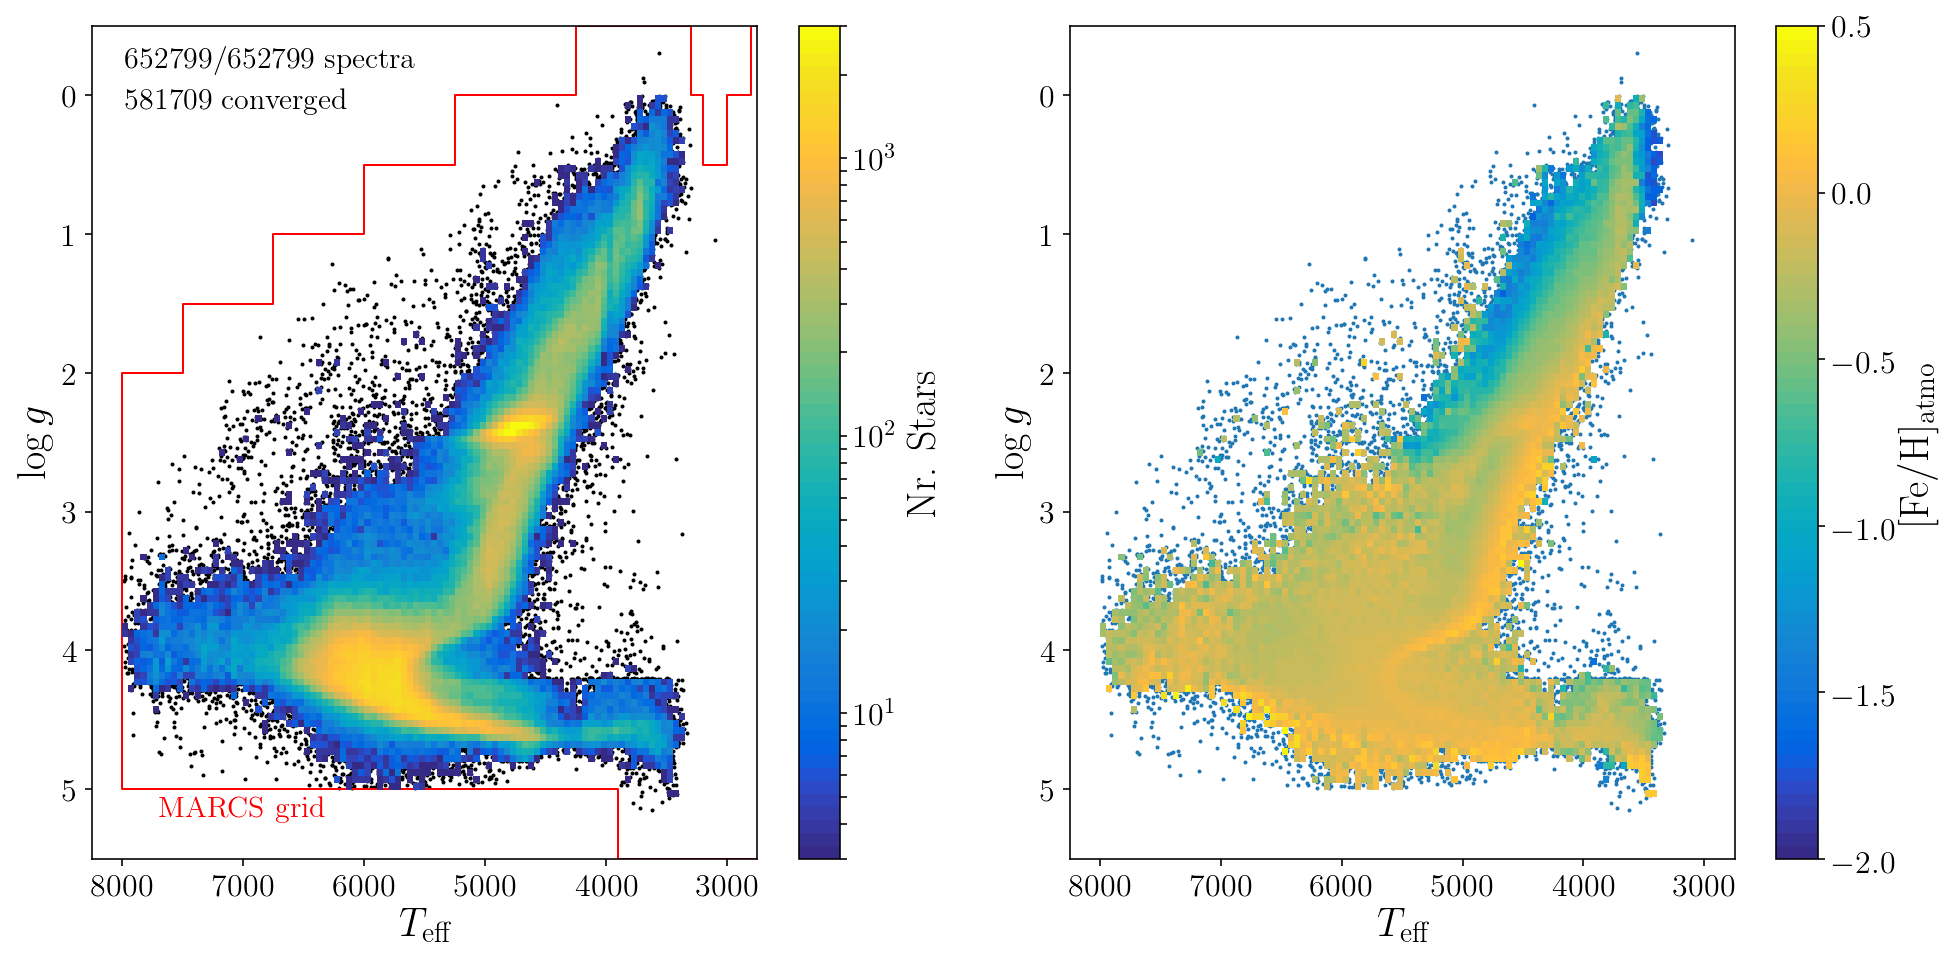

In [60]:
kiel_plot = plot_kiel(joined_subsets[(joined_subsets['flag_sp'] <= 16-1)])
kiel_plot.savefig('../figures/Kiel_Diagram_GALAH_flag_1248.pdf', dpi=300, bbox_inches = 'tight')

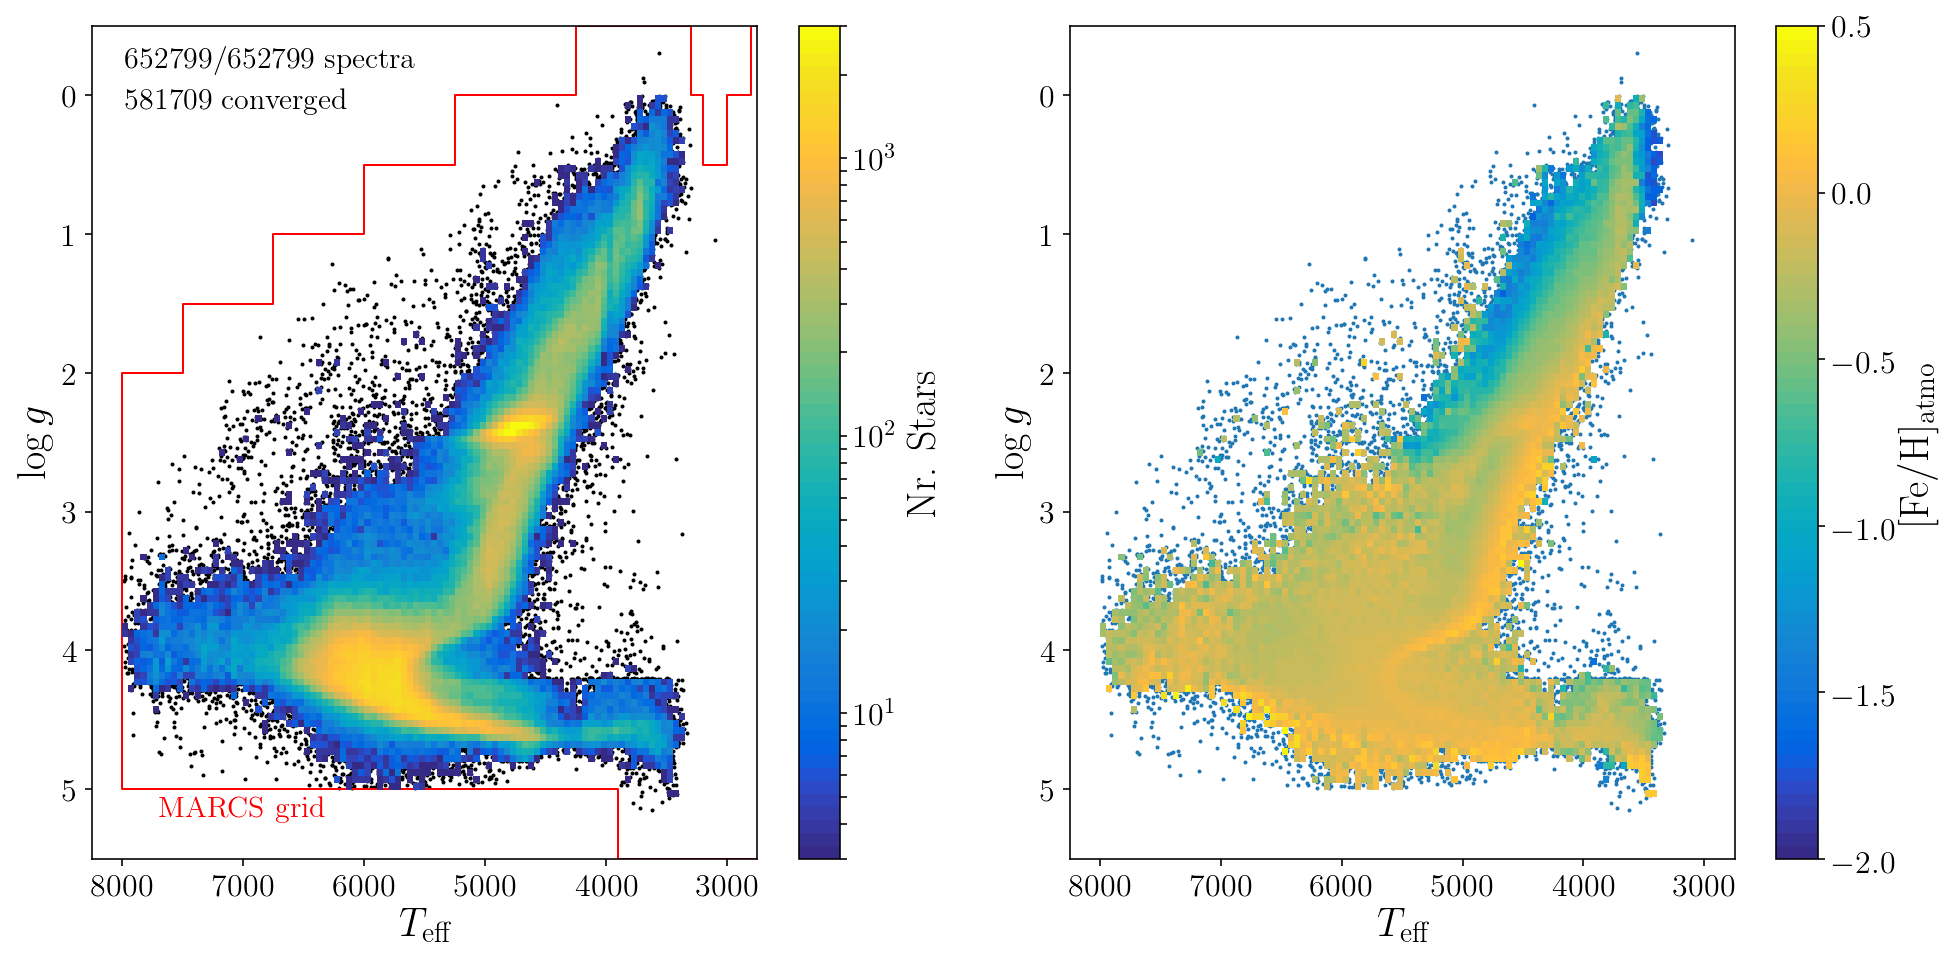

In [61]:
kiel_plot = plot_kiel(joined_subsets[(joined_subsets['flag_sp'] <= 32-1)])
kiel_plot.savefig('../figures/Kiel_Diagram_GALAH_flag_124816.pdf', dpi=300, bbox_inches = 'tight')

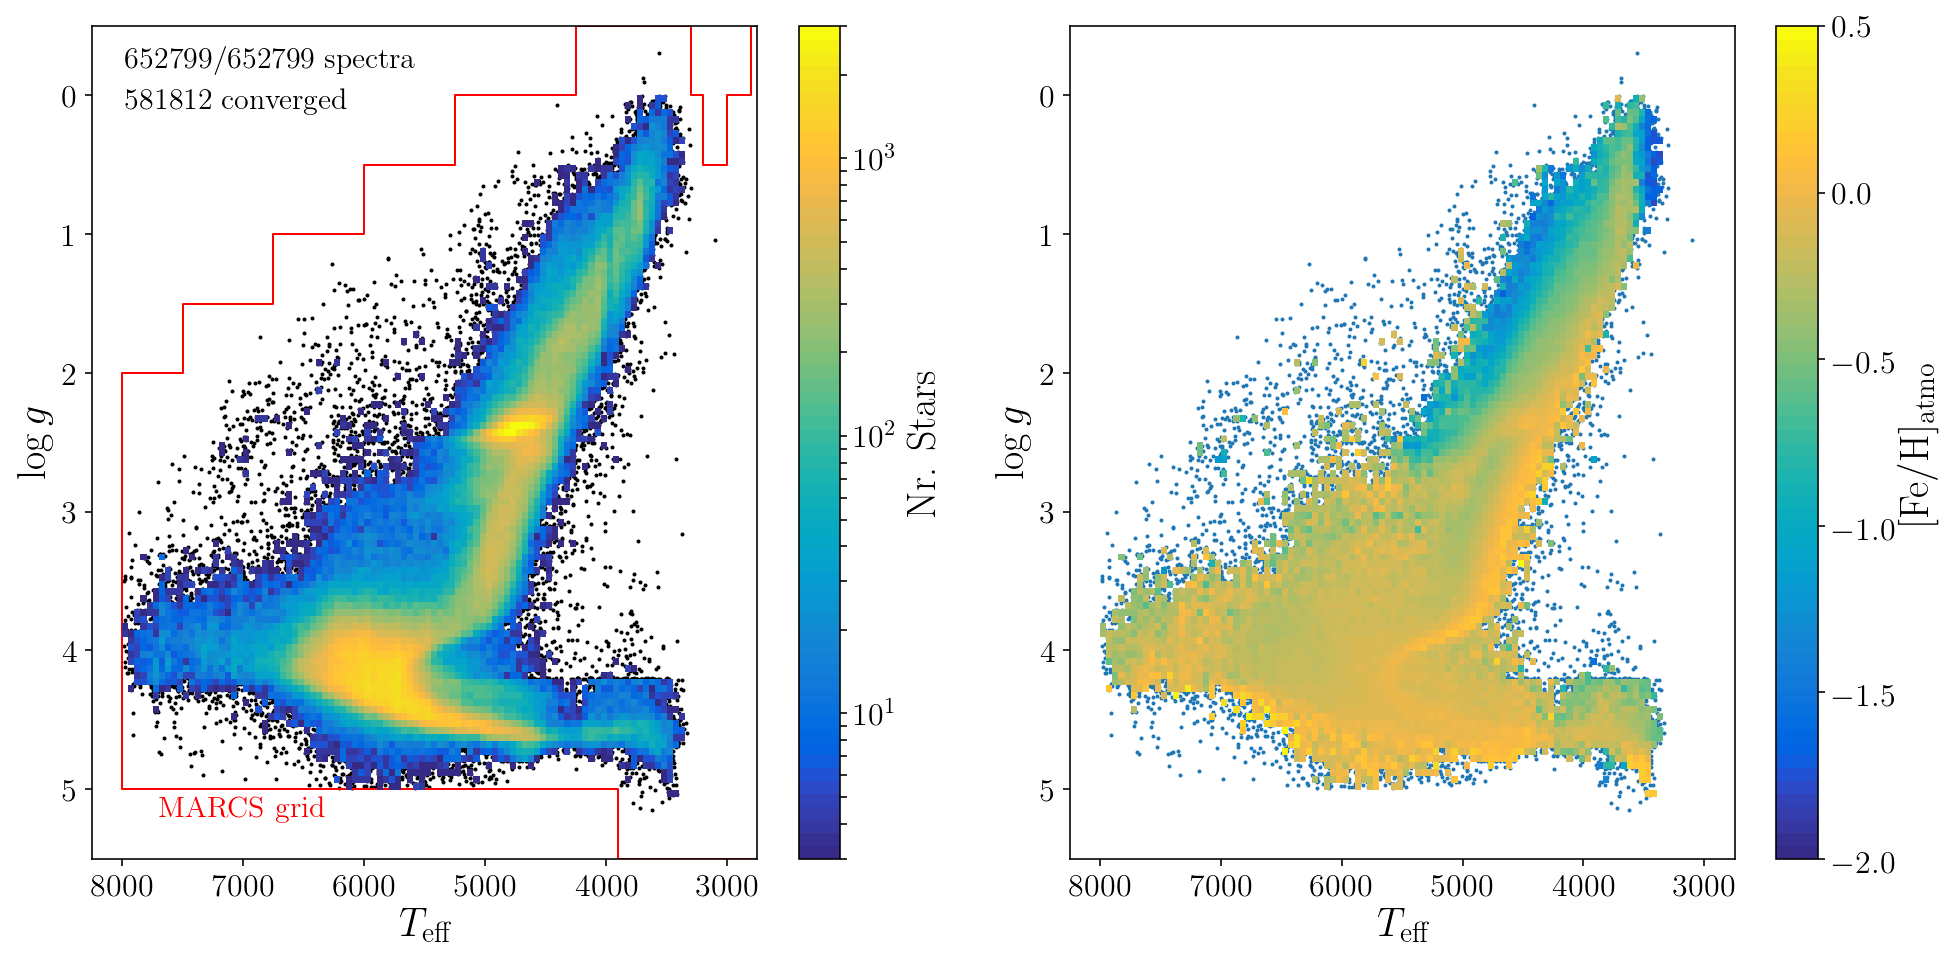

In [62]:
kiel_plot = plot_kiel(joined_subsets[(joined_subsets['flag_sp'] <= 64-1)])
kiel_plot.savefig('../figures/Kiel_Diagram_GALAH_flag_12481632.pdf', dpi=300, bbox_inches = 'tight')

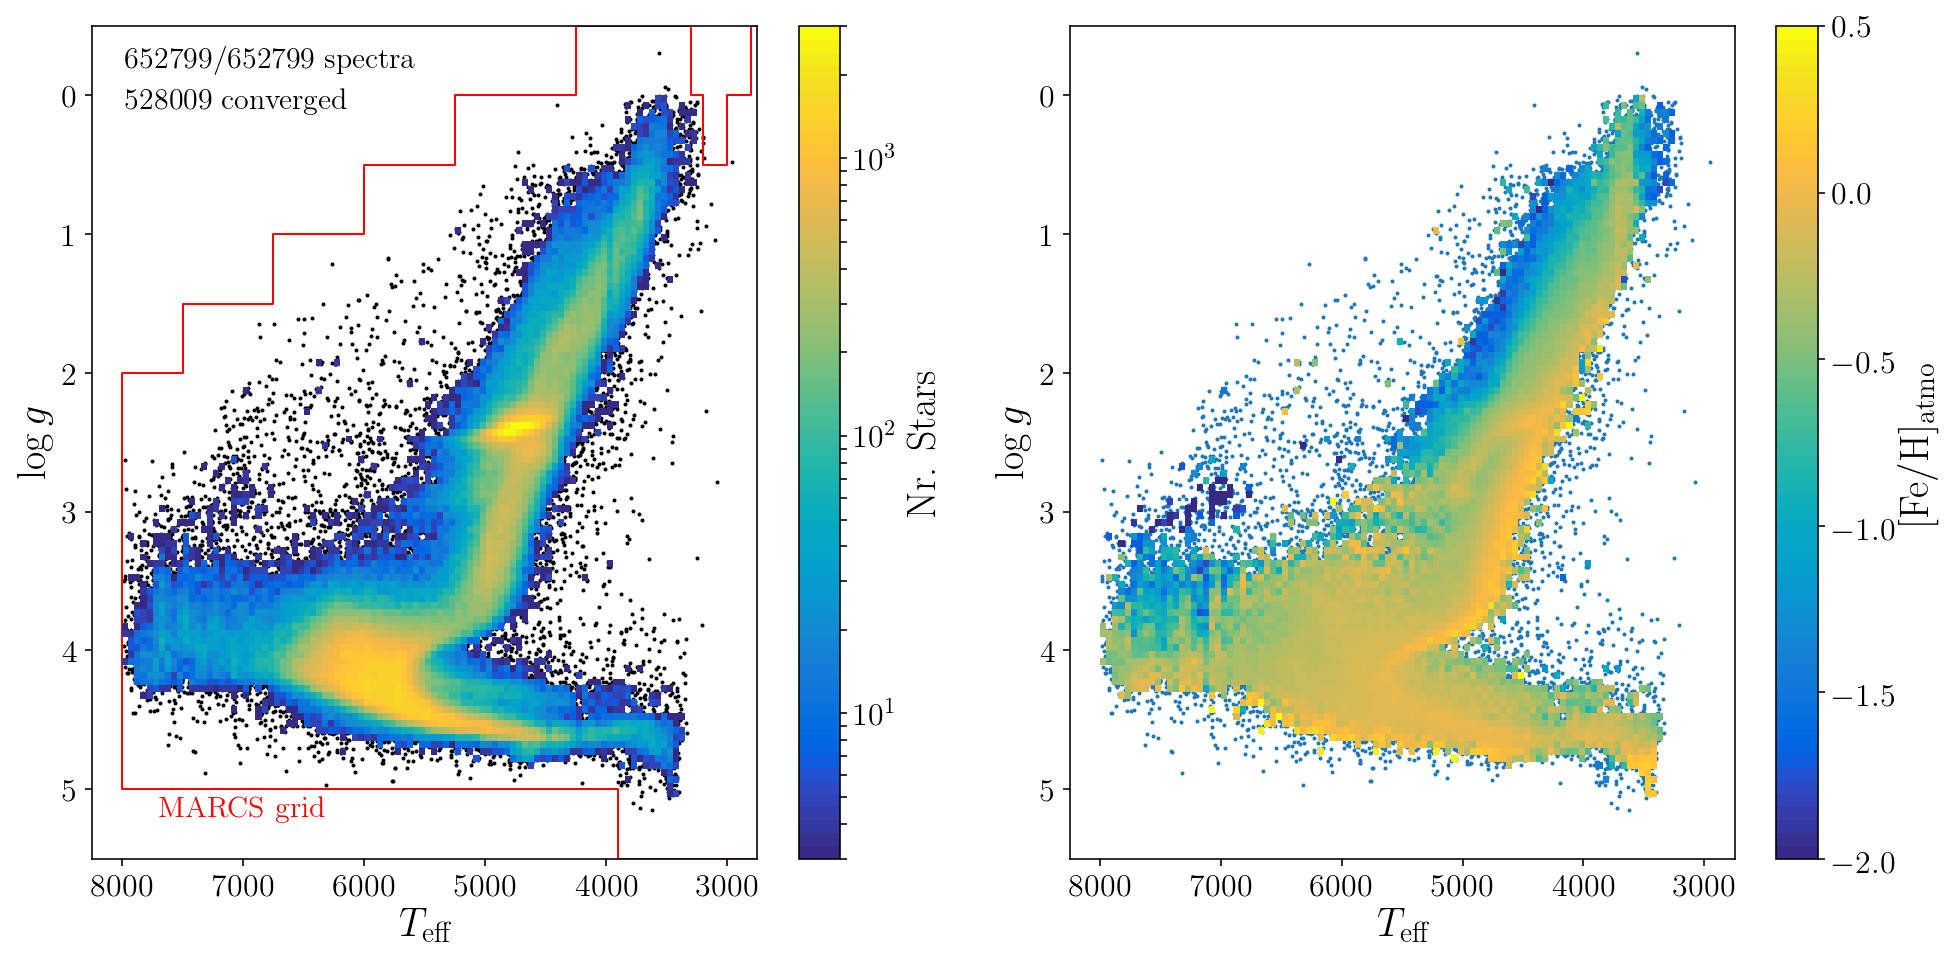

In [63]:
kiel_plot = plot_kiel(joined_subsets[good],cmin=3)
kiel_plot.savefig('../figures/Kiel_Diagram_GALAH_iDR3.pdf', dpi=300, bbox_inches = 'tight')

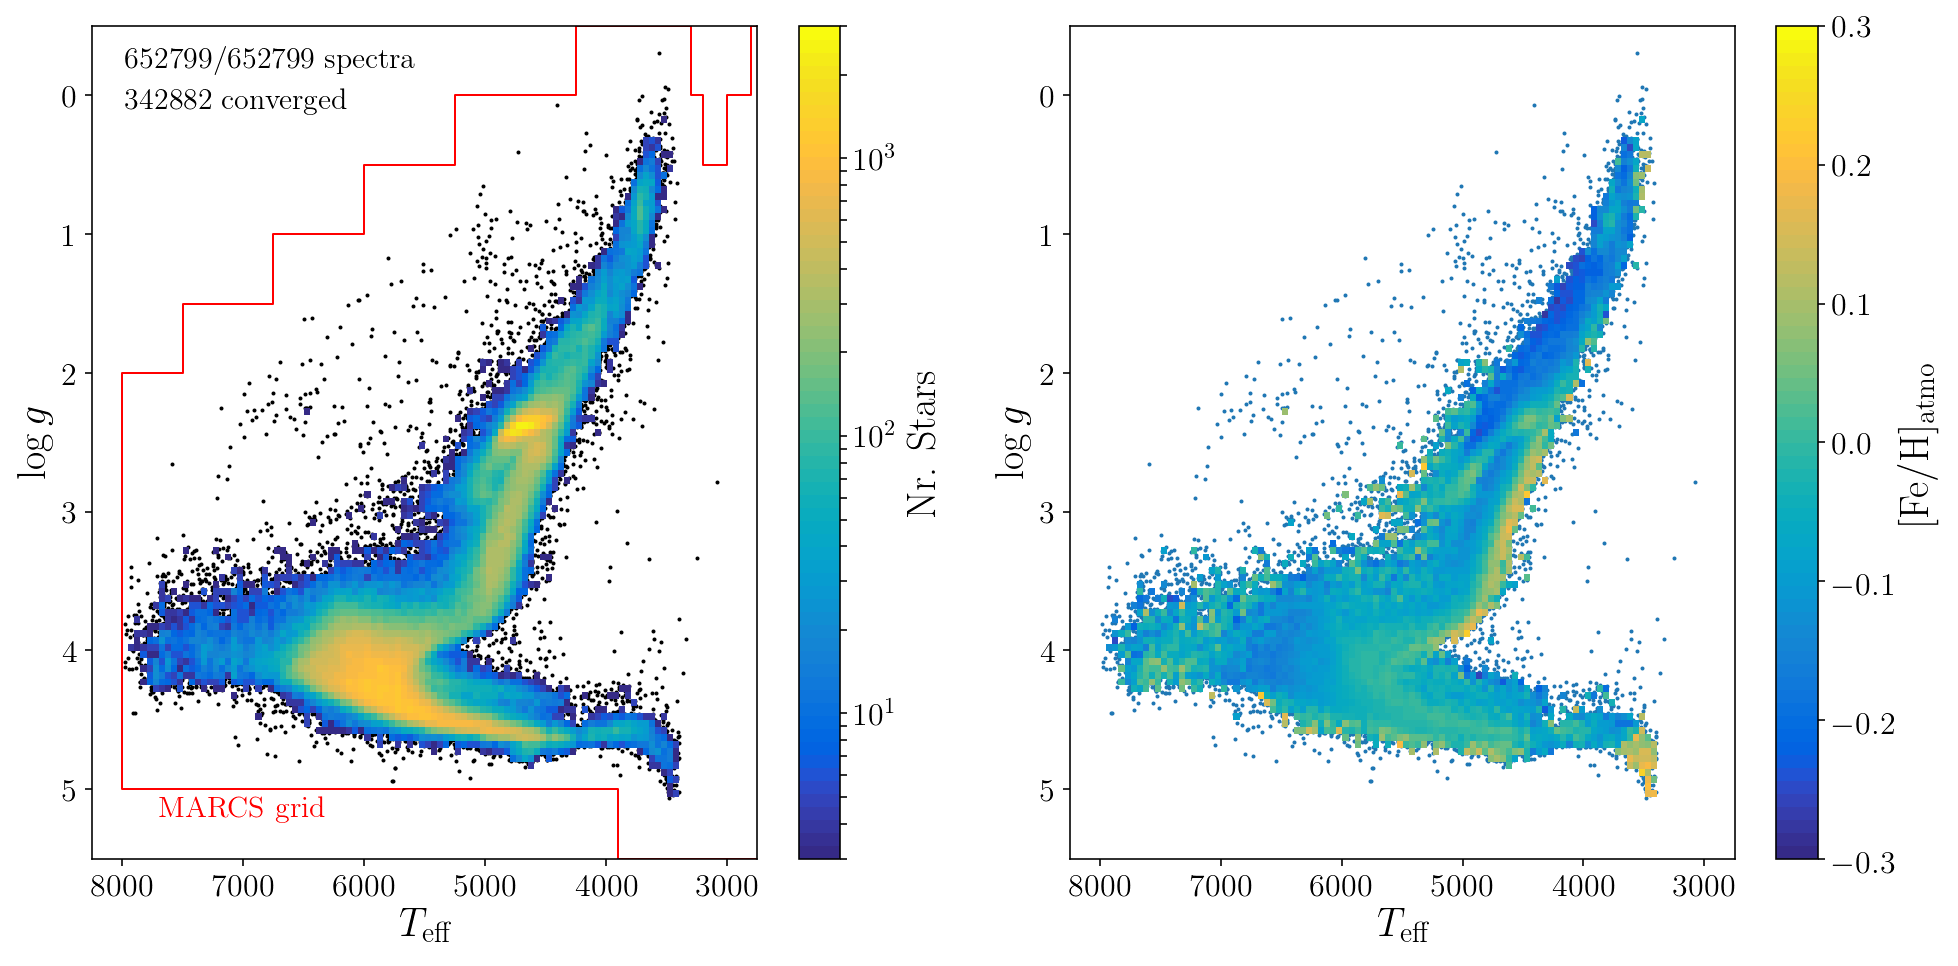

In [64]:
good = (
    (np.abs(joined_subsets['e_teff']) > 0) & 
    (joined_subsets['vbroad'] < 50) & 
    (joined_subsets['snr_c2_iraf'] > 10) &
    (joined_subsets['parallax_error'] / joined_subsets['parallax'] < 0.5) &
    (joined_subsets['ruwe'] < 1.4) &
    (np.abs(4069 - joined_subsets['teff']) > 2) & 
    (np.abs(3748 - joined_subsets['teff']) > 4) & 
    (np.abs(5250 - joined_subsets['teff']) > 2) & 
    (np.abs(5500 - joined_subsets['teff']) > 2) & 
    (np.abs(5750 - joined_subsets['teff']) > 2) & 
    (np.abs(6000 - joined_subsets['teff']) > 2) & 
    (np.abs(6250 - joined_subsets['teff']) > 2) & 
    (np.abs(6500 - joined_subsets['teff']) > 2) & 
    (np.abs(6750 - joined_subsets['teff']) > 2) & 
    (np.abs(7000 - joined_subsets['teff']) > 2) & 
    (np.abs(7250 - joined_subsets['teff']) > 2) & 
    (np.abs(7500 - joined_subsets['teff']) > 2) & 
    (np.abs(7750 - joined_subsets['teff']) > 2) & 
    (np.abs(8000 - joined_subsets['teff']) > 2) & 
    ((np.abs(joined_subsets['logg'] - 4.21) > 0.012) | (joined_subsets['teff'] > 4500)) &
    (joined_subsets['fe_h_atmo'] > -0.3) &
    (joined_subsets['fe_h_atmo'] < 0.3)
    )

kiel_plot = plot_kiel(joined_subsets[good],cmin=3,feh = (-0.3, 0.3))
kiel_plot.savefig('../figures/Kiel_Diagram_GALAH_iDR3_solar.pdf', dpi=300, bbox_inches = 'tight')

In [65]:
# Print [Fe/H] binned Kiel diagrams
# feh_start = -4.1
# feh_step  = 0.1
# feh_stop  = 0.7
# for each_index, each in enumerate(np.arange(feh_start, feh_stop+feh_step, feh_step)):
# #     if each+0.5*feh_step < 0:
# #         if each+0.5*feh_step > -0.99:
# #             name = 'm0'+str(int(round(abs(each+0.5*feh_step)*10)))
# #         else:
# #             name = 'm'+str(int(round(abs(each+0.5*feh_step)*10)))
# #     if each+0.5*feh_step == 0:
# #         name = 'p00'
# #     if each+0.5*feh_step > 0:
# #         name = 'p0'+str(int(round(abs(each+0.5*feh_step)*10)))
# #     print(name)
#     try:
#         if each_index < 10:
#             name = '0'+str(each_index)
#         else:
#             name=str(each_index)
#         kiel_plot = plot_kiel(joined_subsets[((joined_subsets['e_teff'] > 0) & (joined_subsets['fe_h_atmo'] > each)  & (joined_subsets['fe_h_atmo'] <= (each+feh_step)))])
#         kiel_plot.savefig('../figures/sequence/Kiel_Diagram_GALAH_FeH_'+name+'.png', dpi=300, bbox_inches = 'tight')
#         plt.close()
#     except:
#         print('Can not do '+str(each))

# Old stars with $v_\text{tot} > 180\,\mathrm{km s^{-1}}$

(abs(e_teff) > 0) & (sqrt(pow(rv_galah,2) + (pow(4.7623*r_est/1000.,2)*(pow(pmra * cos(dec*PI()/180.),2) + pow(pmdec,2)))) > 180.) & (age > 5)

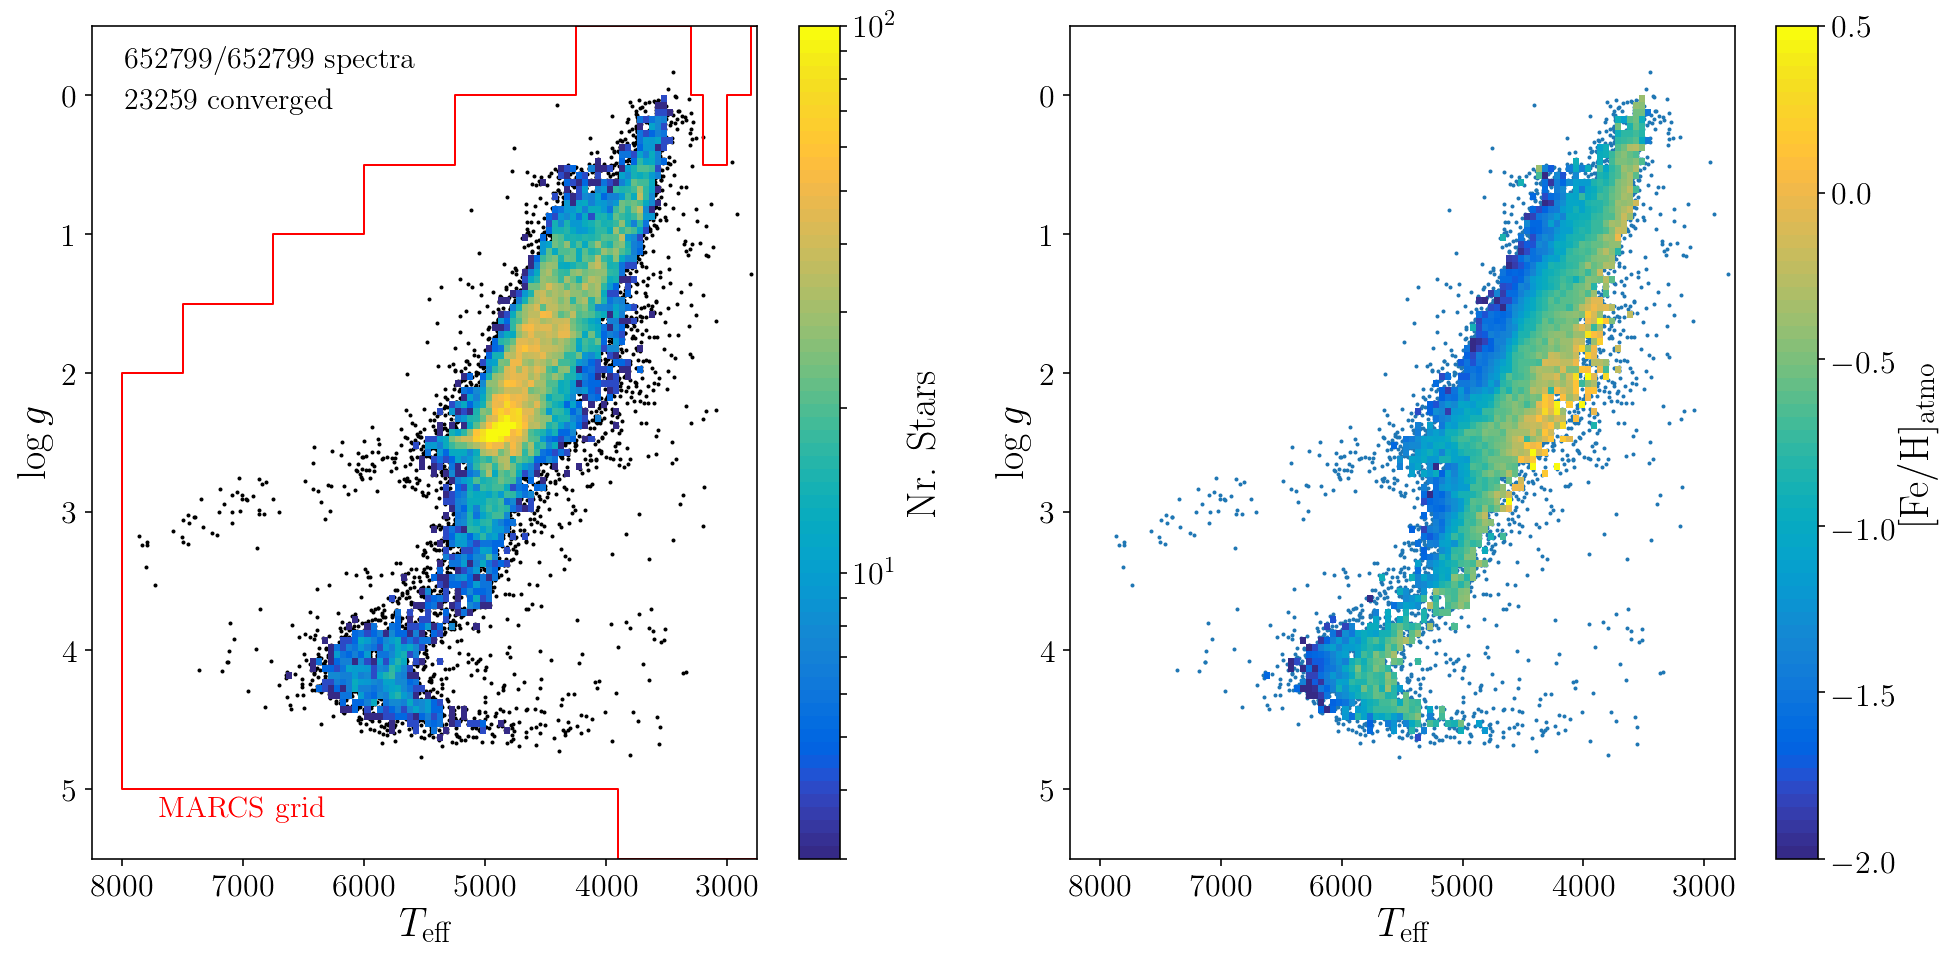

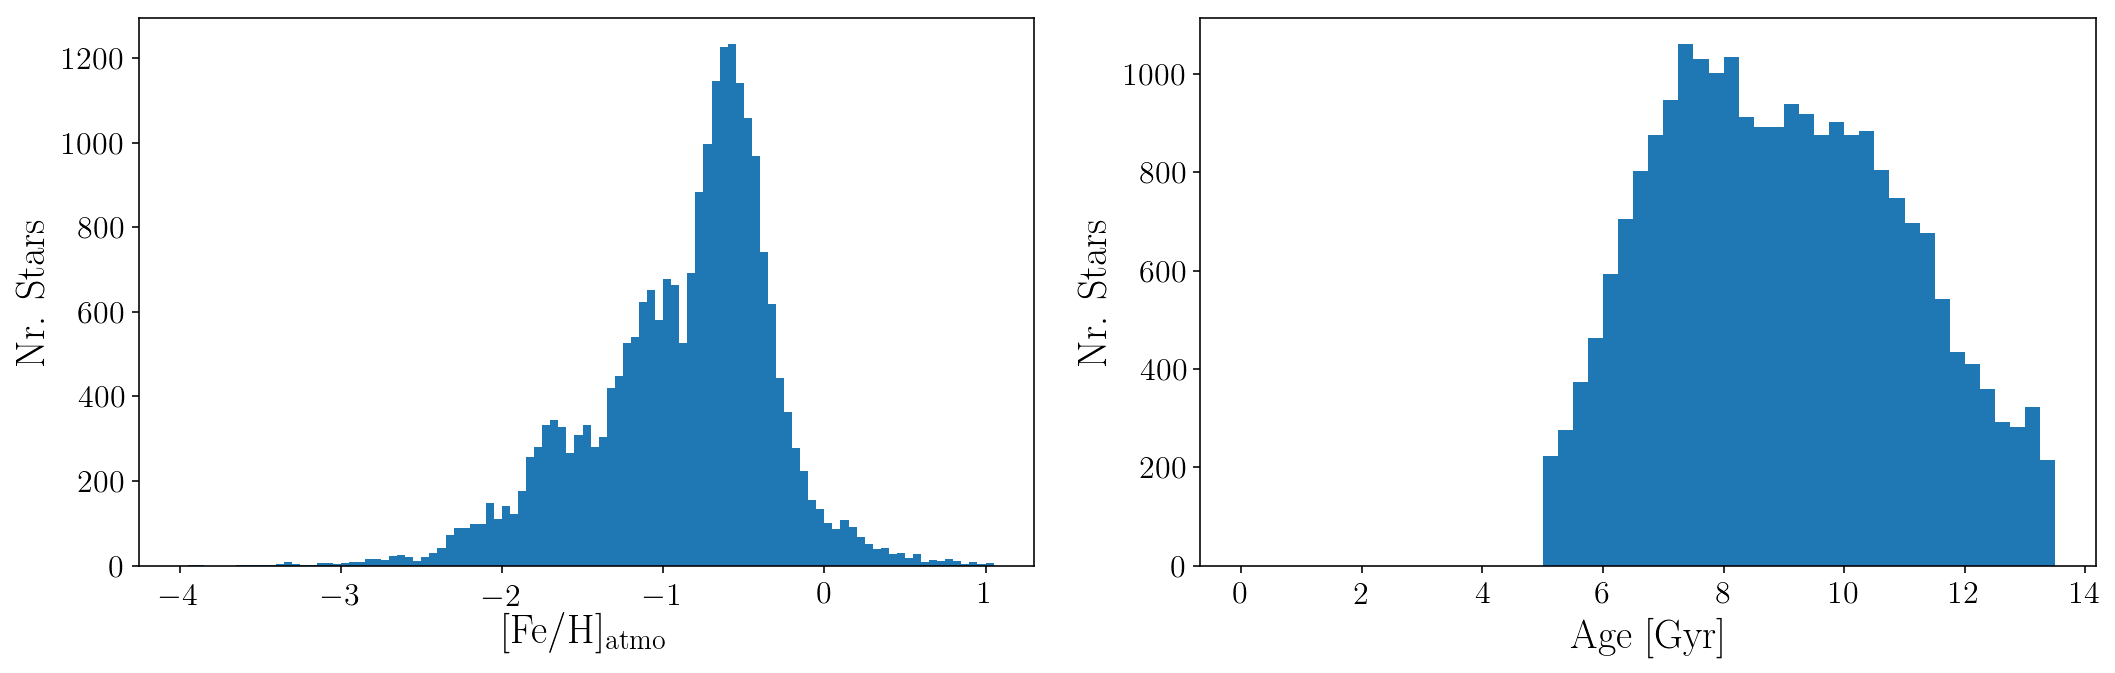

In [66]:
selection = (
    (np.abs(joined_subsets['e_teff']) > 0) & 
    (np.sqrt(
        (joined_subsets['rv_galah'])**2 + 
        (4.7623*joined_subsets['r_est']/1000.)**2 * 
         ((joined_subsets['pmra']*np.cos(joined_subsets['dec']*np.pi/180.))**2 + (joined_subsets['pmdec'])**2)
    ) > 180.) & 
    (joined_subsets['age'] > 5.)
)

kiel_plot = plot_kiel(joined_subsets[selection],vmax=10**2)

plt.savefig('../figures/Kiel_vtot180.pdf',dpi=300)


def plot_hist_feh_age(data):
    
    f, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
    ax1.hist(
        data['fe_h_atmo'],
        bins=np.arange(-4,1.1,0.05)
    );
    ax2.hist(
        data['age'],
        bins=np.arange(0,13.6,0.25)
    );
    ax1.set_xlabel(r'$\mathrm{[Fe/H]_\text{atmo}}$')
    ax2.set_xlabel(r'Age [Gyr]')
    ax1.set_ylabel('Nr. Stars')
    ax2.set_ylabel('Nr. Stars')
    plt.tight_layout()
    
plot_hist_feh_age(joined_subsets[selection])

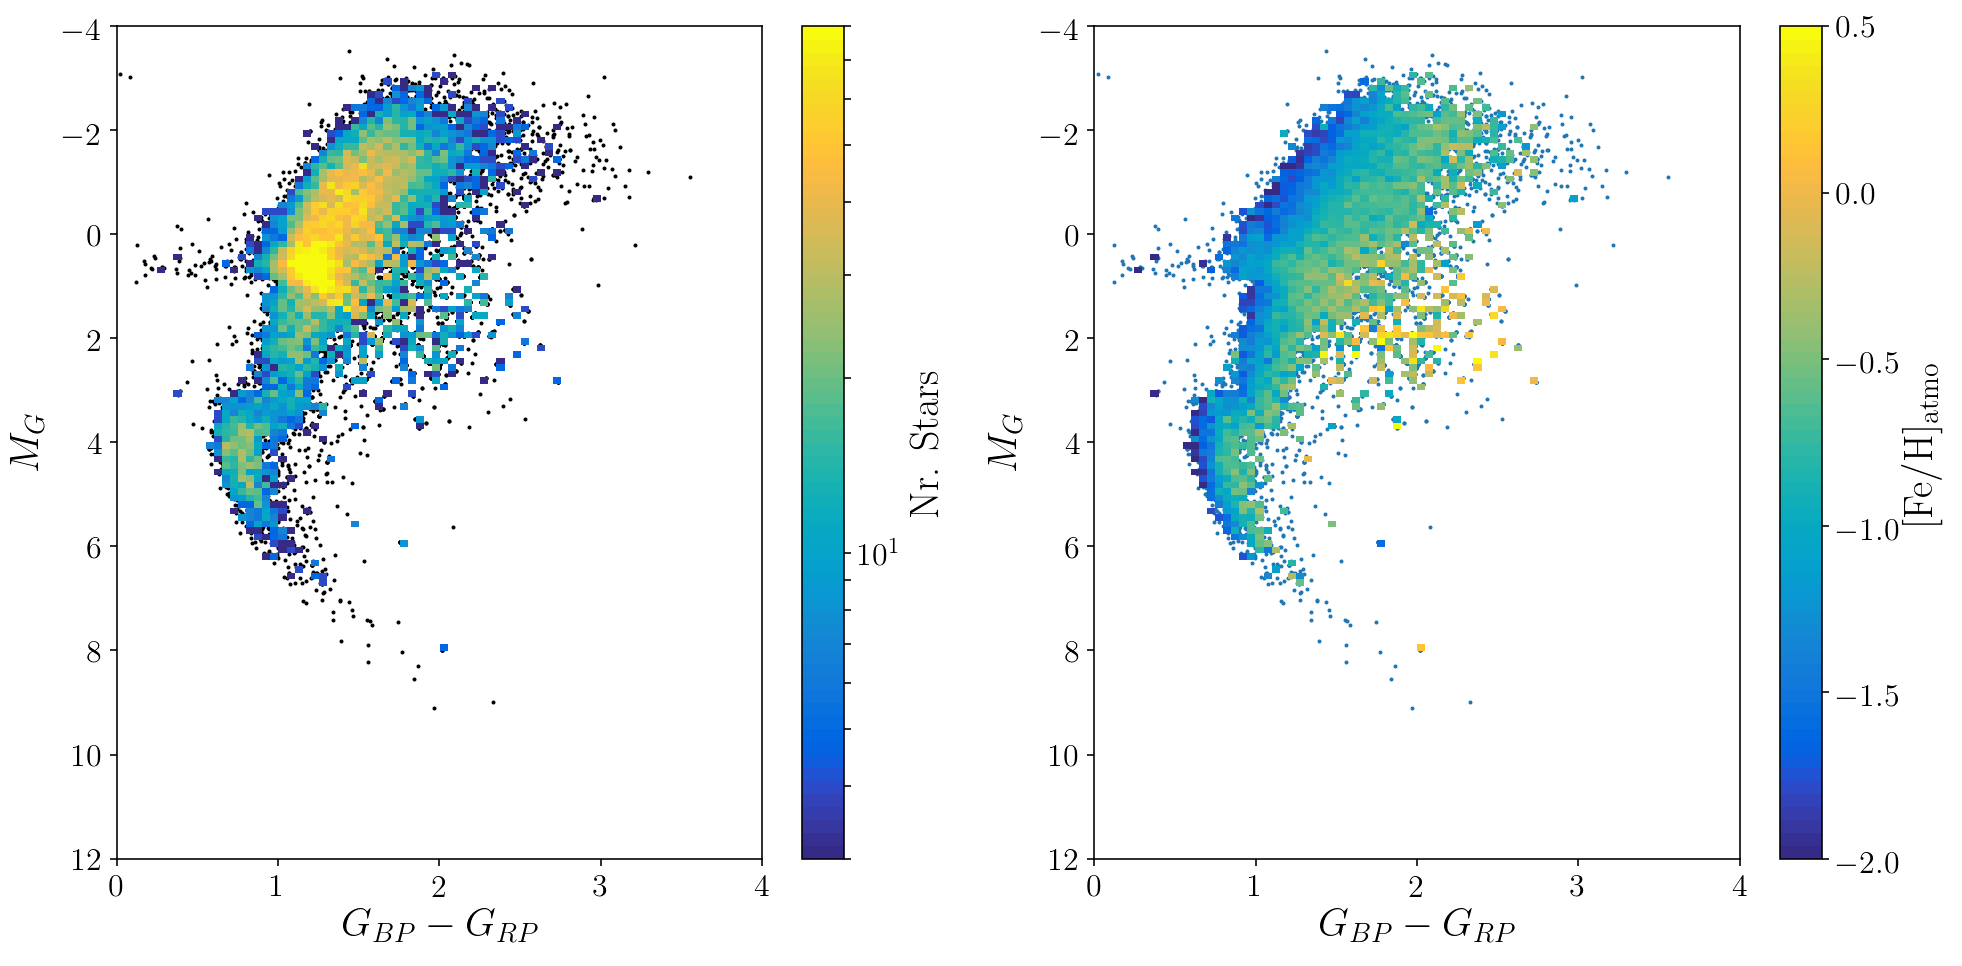

In [67]:
def plot_cmd(data, isochrones = False, cmin = 3, vmax = 3*10**3, bp_rp = (0,4,0.05), mg = (-4,12,0.125), feh = (-2, 0.5)):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize = (14,7))
    
    marcs_kwargs = dict(
        c = 'r',
        lw = 1
    )
        
    hist_scatter = dict(
        s = 1,
        c = 'k',
        zorder = 1,
        rasterized = True
    )
    
    ax1.scatter(
        data['bp_rp'],
        data['phot_g_mean_mag'] - 5*np.log10(data['r_est']/10.),
        **hist_scatter
    )
    
    hist_kwargs_density = dict(
        cmap = parula,
        cmin = cmin,
        bins = (
            np.arange(bp_rp[0],bp_rp[1] + bp_rp[2], bp_rp[2]),
            np.arange(mg[0],mg[1] + mg[2], mg[2])
        ),
        vmin=cmin, vmax=vmax,
        rasterized = True,
        norm=LogNorm()
    )
    
    p1, x1, y1, s1 = ax1.hist2d(
        data['bp_rp'],
        data['phot_g_mean_mag'] - 5*np.log10(data['r_est']/10.),
        zorder=2,
        **hist_kwargs_density
    )
    
    ax1.set_xlim(bp_rp[0],bp_rp[1])
    ax1.set_xlabel(r'$G_{BP} - G_{RP}$')
    ax1.set_ylim(mg[1],mg[0])
    ax1.set_ylabel(r'$M_G$')
    c1 = plt.colorbar(s1, ax=ax1)
    c1.set_label('Nr. Stars')
    
    #######

    hist_scatter = dict(
        s = 1,
        cmap = parula,
        zorder = 1,
        vmin = feh[0], vmax=feh[1],
        rasterized = True
    )
    
    ax2.scatter(
        data['bp_rp'],
        data['phot_g_mean_mag'] - 5*np.log10(data['r_est']/10.),
        **hist_scatter
    )
    
    hist_kwargs_mean_value = dict(
        reduce_fn='mean',
        bins = (
            np.arange(bp_rp[0],bp_rp[1]+bp_rp[2],bp_rp[2]),
            np.arange(mg[0],mg[1]+mg[2],mg[2])
        ),
        vmin=feh[0],vmax=feh[1],
        cmap = parula,
        cmin = cmin,
        rasterized = True,
        zorder=2
    )
    
    s2 = plot_density(
        data['bp_rp'],
        data['phot_g_mean_mag'] - 5*np.log10(data['r_est']/10.),
        weights = data['fe_h_atmo'],
        ax = ax2,
        **hist_kwargs_mean_value
        )

    ax2.set_xlim(bp_rp[0],bp_rp[1])
    ax2.set_xlabel(r'$G_{BP} - G_{RP}$')
    ax2.set_ylim(mg[1],mg[0])
    ax2.set_ylabel(r'$M_G$')
    c2 = plt.colorbar(s2, ax=ax2)
    c2.set_label(r'$\mathrm{[Fe/H]_\text{atmo}}$')
    
    plt.tight_layout()
    return f

selection = (
    np.isfinite(joined_subsets['bp_rp']) & 
    (np.abs(joined_subsets['e_teff']) > 0) & 
    (np.sqrt(
        (joined_subsets['rv_galah'])**2 + 
        (4.7623*joined_subsets['r_est']/1000.)**2 * 
         ((joined_subsets['pmra']*np.cos(joined_subsets['dec']*np.pi/180.))**2 + (joined_subsets['pmdec'])**2)
    ) > 180.) & 
    (joined_subsets['age'] > 5.)
)

kiel_plot = plot_cmd(joined_subsets[selection], vmax=80)
plt.savefig('../figures/high_vtot_cmd.pdf',dpi=300)

# Young stars with $v_\text{tot} > 180\,\mathrm{km s^{-1}}$

(abs(e_teff) > 0) & (sqrt(pow(rv_galah,2) + (pow(4.7623*r_est/1000.,2)*(pow(pmra * cos(dec*PI()/180.),2) + pow(pmdec,2)))) > 180.) & (age <= 5)

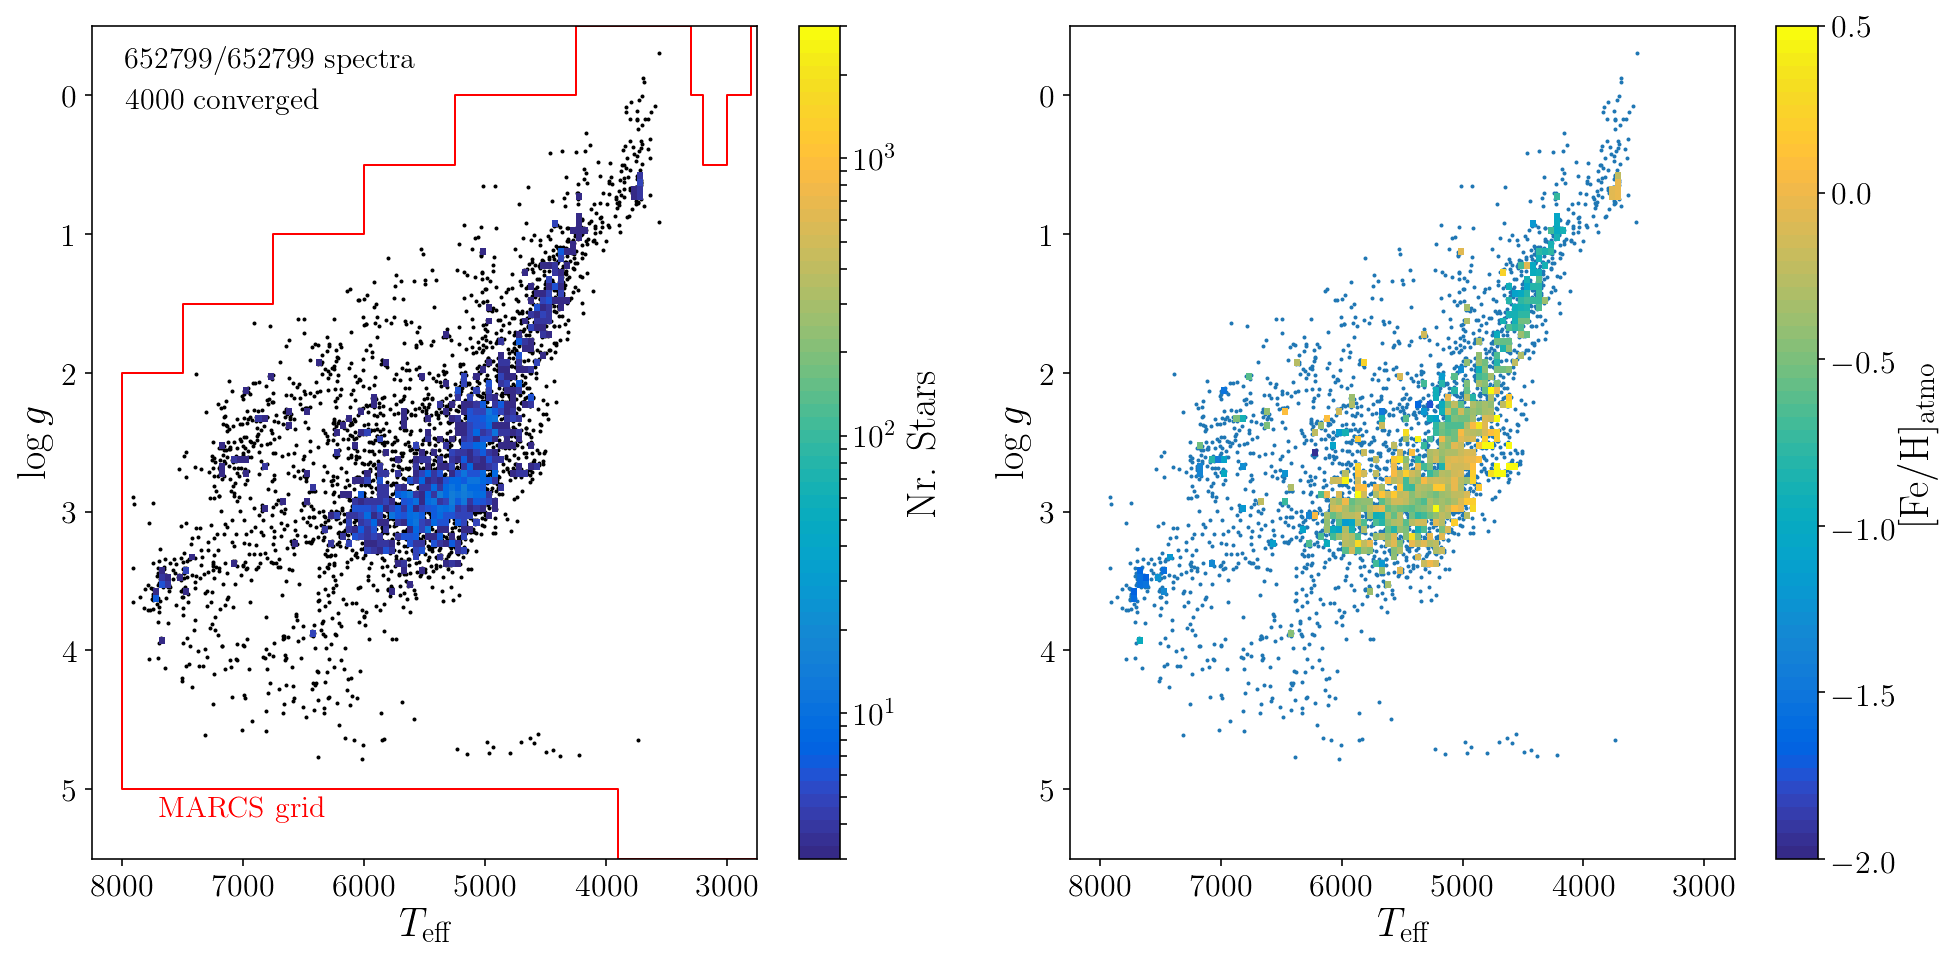

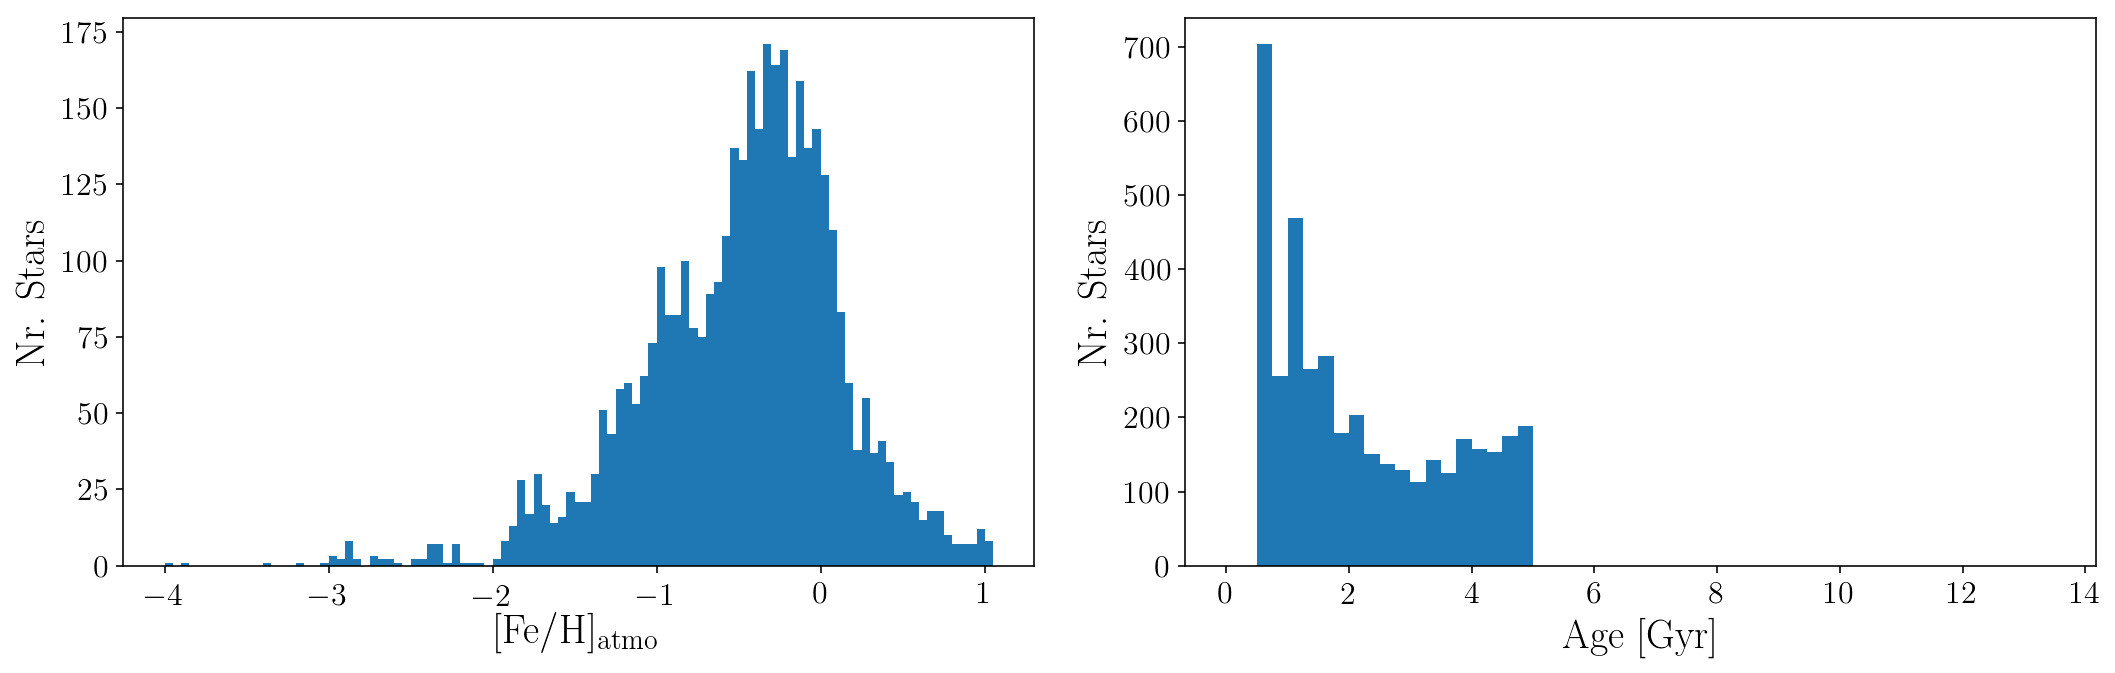

In [68]:
selection = (
    (np.abs(joined_subsets['e_teff']) > 0) & 
    (np.sqrt(
        (joined_subsets['rv_galah'])**2 + 
        (4.7623*joined_subsets['r_est']/1000.)**2 * 
         ((joined_subsets['pmra']*np.cos(joined_subsets['dec']*np.pi/180.))**2 + (joined_subsets['pmdec'])**2)
    ) > 180.) & 
    (joined_subsets['age'] <= 5.)
)

kiel_plot = plot_kiel(joined_subsets[selection])

def plot_hist_feh_age(data):
    
    f, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
    ax1.hist(
        data['fe_h_atmo'],
        bins=np.arange(-4,1.1,0.05)
    );
    ax2.hist(
        data['age'],
        bins=np.arange(0,13.6,0.25)
    );
    ax1.set_xlabel(r'$\mathrm{[Fe/H]_\text{atmo}}$')
    ax2.set_xlabel(r'Age [Gyr]')
    ax1.set_ylabel('Nr. Stars')
    ax2.set_ylabel('Nr. Stars')
    plt.tight_layout()
    
plot_hist_feh_age(joined_subsets[selection])

# ABUNDANCES

In [69]:
def plot_xfe(data, data_abund, X = 'Li', cmin=1, fe_h = 'fe_h_atmo', fe_h_bins=np.arange(-4.0,1.0,0.05), a_x_bins=np.arange(-2,4.05,0.05), x_fe_bins=np.arange(-1,1.01,0.05)):
    f, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
    
    hist2d_kwargs = dict(
        cmap=parula, cmin=cmin, norm=LogNorm()
        )
    p1, x1, y1, s1 = ax1.hist2d(
        data[fe_h],
        data_abund['A_'+X],
        bins = (fe_h_bins, a_x_bins),
        **hist2d_kwargs
        )
    p2, x2, y2, s2 = ax2.hist2d(
        data[fe_h],
        data[X+'_fe'],
        bins = (fe_h_bins, x_fe_bins),
        **hist2d_kwargs
        )
    ax1.set_ylabel('A('+X+')')
    c1 = plt.colorbar(s1, ax=ax1)
    c2 = plt.colorbar(s2, ax=ax2)
    c1.set_label('Nr. Spectra')
    c2.set_label('Nr. Spectra')
    if fe_h == 'fe_h_atmo':
        ax1.set_xlabel(r'$\mathrm{[Fe/H]}_\text{atmo}$')
        ax2.set_xlabel(r'$\mathrm{[Fe/H]}_\text{atmo}$')
        ax2.set_ylabel(r'$\mathrm{[{'+X+r'/Fe}_\text{atmo}]}$')
    else:
        ax1.set_xlabel(r'$\mathrm{[Fe/H]}$')
        ax2.set_xlabel(r'$\mathrm{[Fe/H]}$')
        ax2.set_ylabel(r'$\mathrm{['+X+'/Fe]}$')    
    plt.tight_layout()

In [70]:
def plot_final_xfe(data, data_abund, X = 'Li', cmin=1, fe_h = 'fe_h', fe_h_bins=np.arange(-4.0,1.0,0.05), limits=[-1,1]):
    f, (ax2) = plt.subplots(1)
    
    x_fe_bins = np.linspace(limits[0],limits[1],100)
    
    hist2d_kwargs = dict(
        cmap=parula, cmin=cmin, norm=LogNorm()
        )
    p2, x2, y2, s2 = ax2.hist2d(
        data[fe_h],
        data[X+'_fe'],
        bins = (fe_h_bins, x_fe_bins),
        **hist2d_kwargs
        )
    c2 = plt.colorbar(s2, ax=ax2)
    c2.set_label('Nr. Spectra')
    if fe_h == 'fe_h_atmo':
        ax2.set_xlabel(r'$\mathrm{[Fe/H]}_\text{atmo}$')
        ax2.set_ylabel(r'$\mathrm{[{'+X+r'/Fe}_\text{atmo}]}$')
    else:
        ax2.set_xlabel(r'$\mathrm{[Fe/H]}$')
        ax2.set_ylabel(r'$\mathrm{['+X+'/Fe]}$')    
    plt.tight_layout()

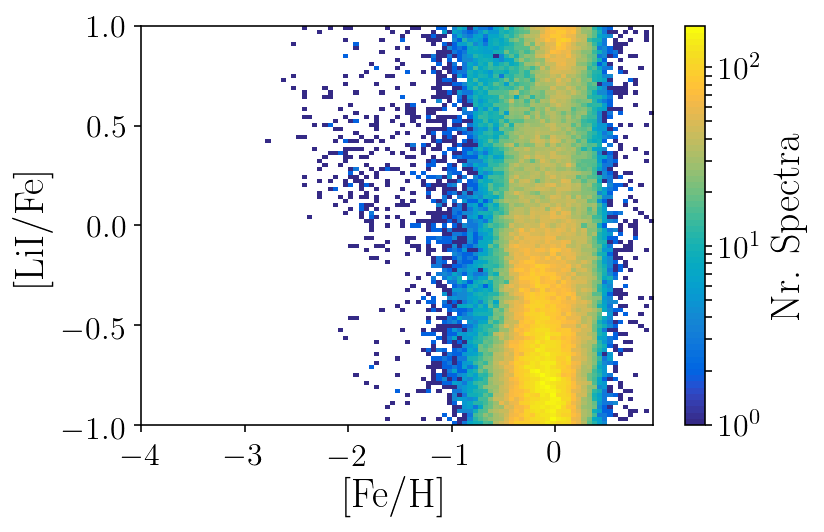

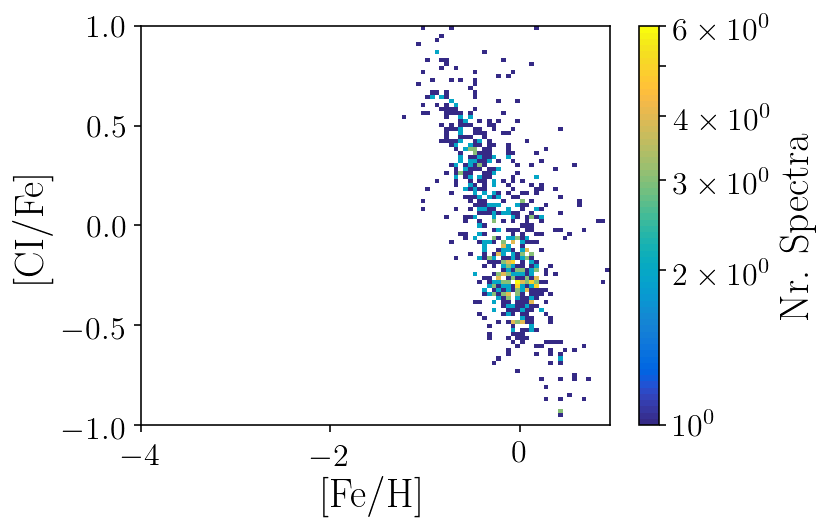

In [71]:
for each_element in [
    'LiI',
    'CI',
#     'OI',
#     'NaI',
#     'MgI',
#     'AlI',
#     'SiI',
#     'KI',
#     'CaI',
#     'ScI',
#     'ScII',
#     'TiI',
#     'TiII',
#     'VI',
#     'CrI',
#     'MnI',
#     'CoI',
#     'NiI',
#     'CuI',
#     'ZnI',
#     'RbI',
#     'SrI',
#     'YII',
#     'ZrI',
#     'MoI',
#     'RuI',
#     'BaII',
#     'LaII',
#     'CeII',
#     'NdII',
#     'SmII',
#     'EuII'
    ]:
    
    selection = (
        (joined_subsets['flag_sp'] <= 0+1+2+4) #&
        #((joined_subsets['flag_'+each_element] == 0) | (joined_subsets['flag_'+each_element] == 8))    
    )
    
    limits = {}
    limits['LiI'] = [-3,4]
    
    try:

        if each_element == 'Li':
            plot_final_xfe(data=joined_subsets[selection], data_abund=joined_subsets_abund[selection], X = each_element, limits=limits[each_element])        
        else:
            plot_final_xfe(data=joined_subsets[selection], data_abund=joined_subsets_abund[selection], X = each_element)        
            
    except:
        print('None for '+each_element)

## Li

274219


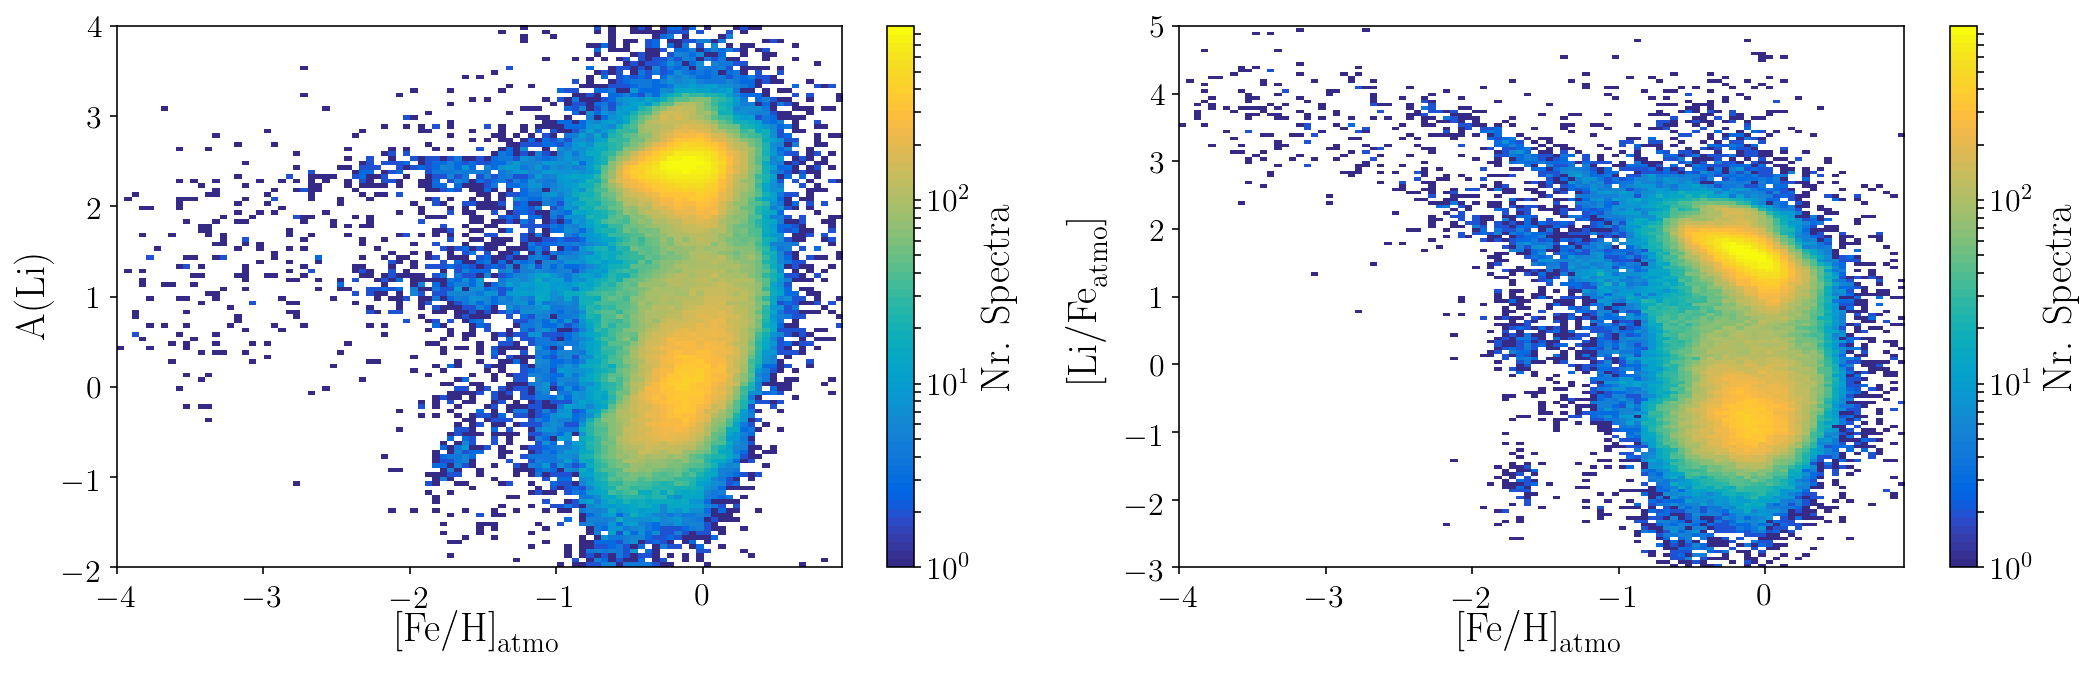

In [72]:
selection = (
    (np.abs(joined_subsets['e_teff']) > 0) &
    (joined_subsets['flag_Li'] == 0) &
    np.isfinite(joined_subsets_abund['A_Li'])
)

print(len(joined_subsets[selection]))

plot_xfe(data=joined_subsets[selection], data_abund=joined_subsets_abund[selection], X = 'Li',x_fe_bins=np.arange(-3,5.01,0.05))

397306


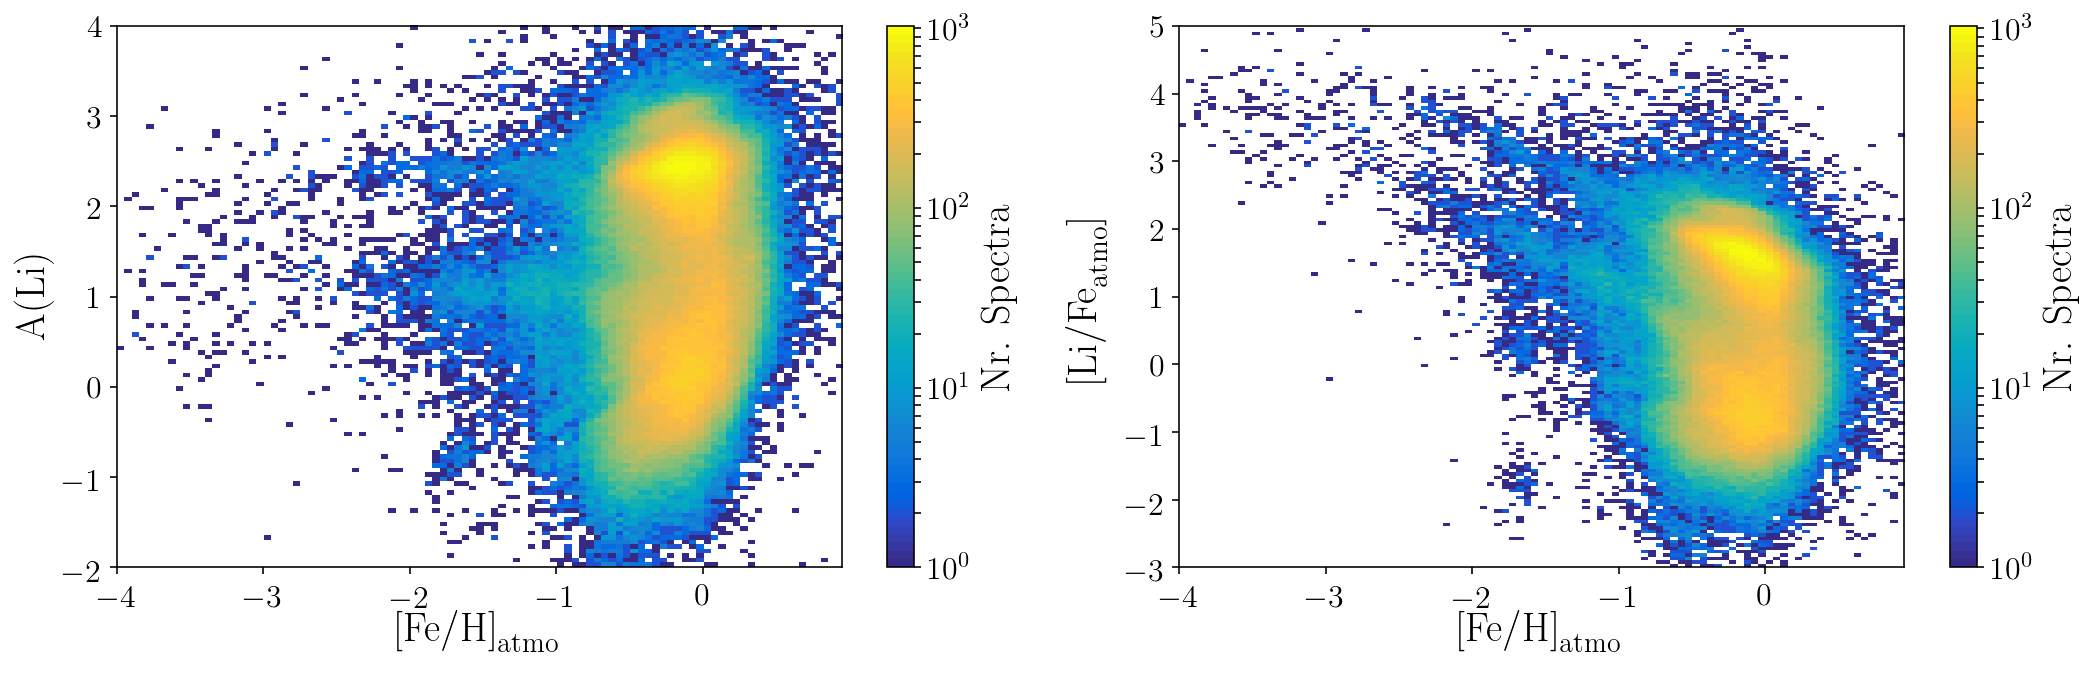

In [73]:
selection = (
    (np.abs(joined_subsets['e_teff']) > 0) &
    (joined_subsets['flag_Li'] <= 1) &
    np.isfinite(joined_subsets_abund['A_Li'])
)

print(len(joined_subsets[selection]))

plot_xfe(data=joined_subsets[selection], data_abund=joined_subsets_abund[selection], X = 'Li',x_fe_bins=np.arange(-3,5.01,0.05))

5715


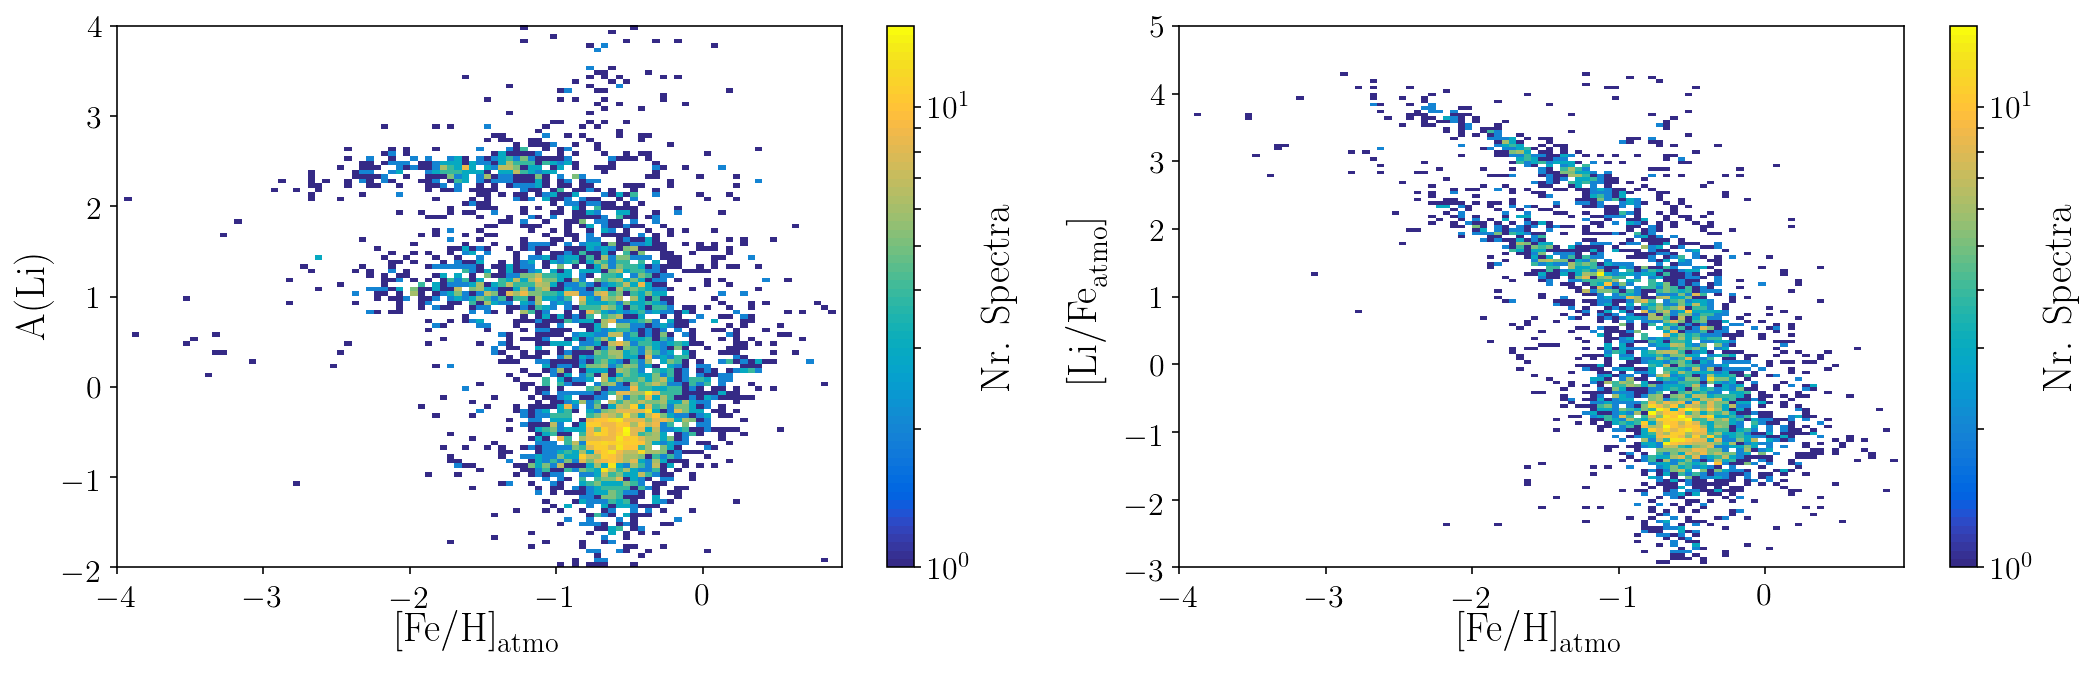

In [74]:
selection = (
    (np.abs(joined_subsets['e_teff']) > 0) & 
    (np.sqrt(
        (joined_subsets['rv_galah'])**2 + 
        (4.7623*joined_subsets['r_est']/1000.)**2 * 
         ((joined_subsets['pmra']*np.cos(joined_subsets['dec']*np.pi/180.))**2 + (joined_subsets['pmdec'])**2)
    ) > 180.) & 
    (joined_subsets['age'] > 5.) &
    (joined_subsets['flag_Li'] == 0) &
    np.isfinite(joined_subsets_abund['A_Li'])
)

print(len(joined_subsets[selection]))

plot_xfe(data=joined_subsets[selection], data_abund=joined_subsets_abund[selection], X = 'Li',x_fe_bins=np.arange(-3,5.01,0.05))

## Mg5711

586481


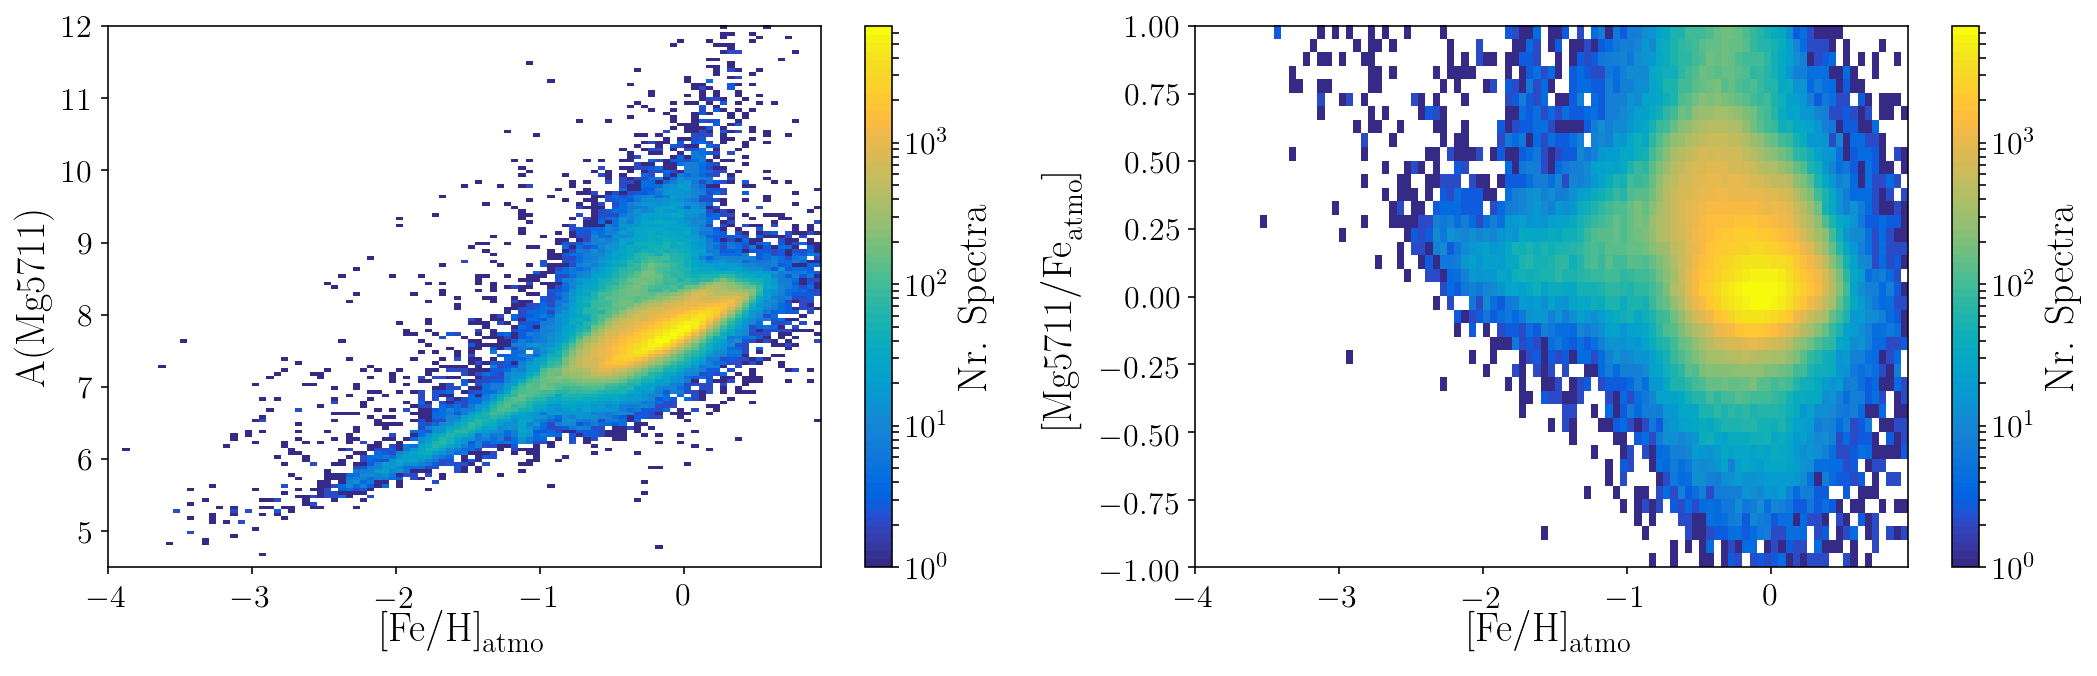

In [75]:
selection = (
    (np.abs(joined_subsets['e_teff']) > 0) &
    (joined_subsets['flag_Mg5711'] == 0) &
    np.isfinite(joined_subsets_abund['A_Mg5711'])
)

print(len(joined_subsets[selection]))

plot_xfe(data=joined_subsets[selection], data_abund=joined_subsets_abund[selection], X = 'Mg5711',a_x_bins=np.arange(4.5,12.01,0.05))

606468


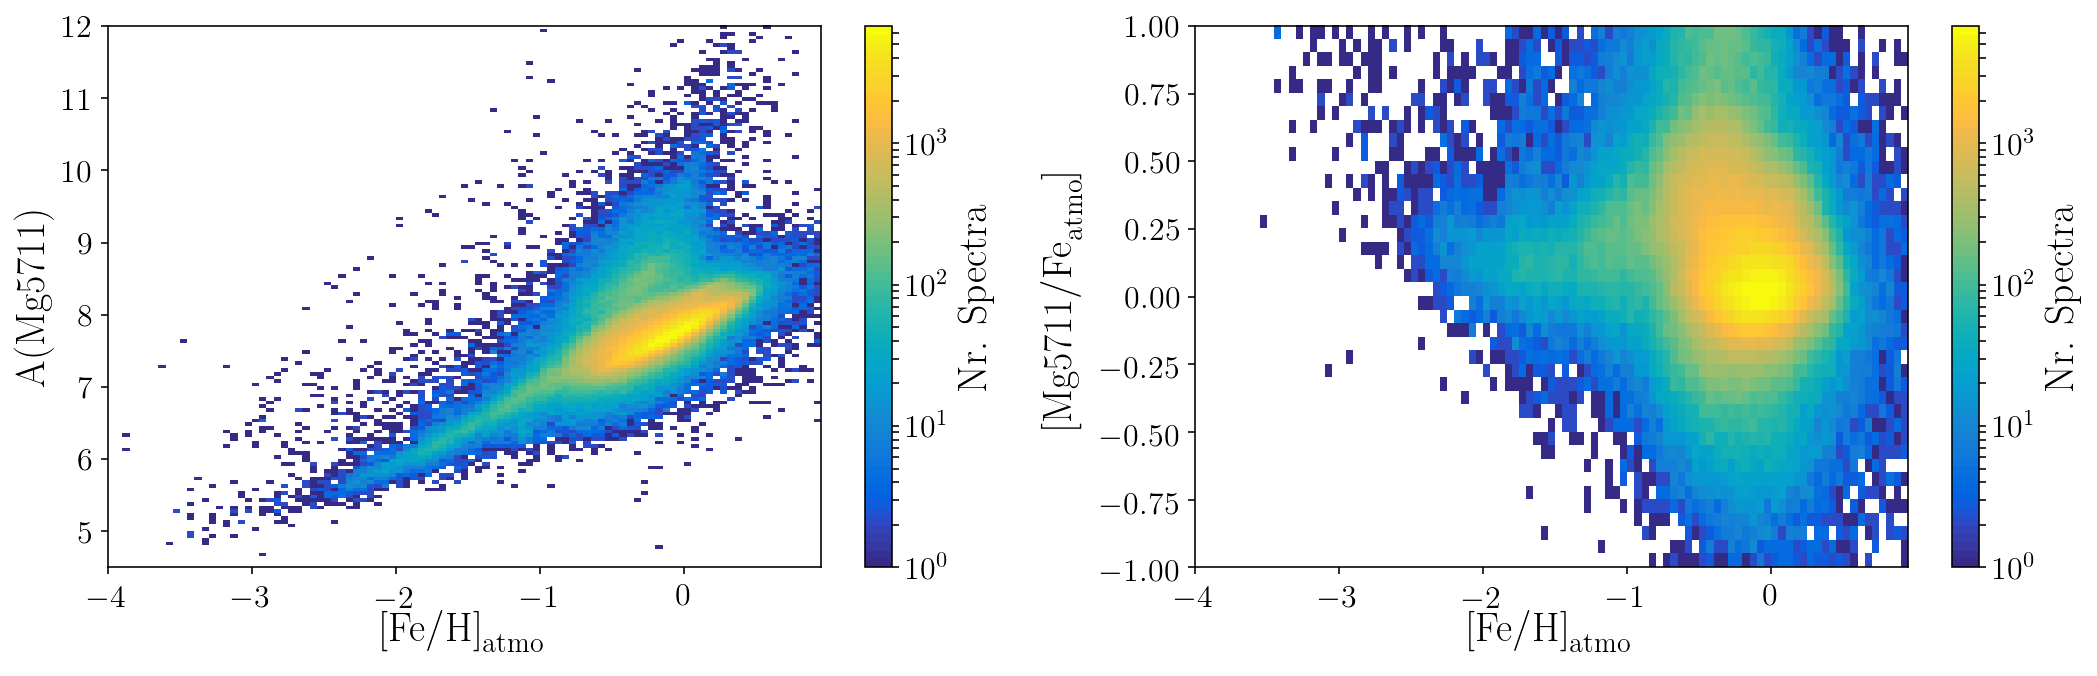

In [76]:
selection = (
    (np.abs(joined_subsets['e_teff']) > 0) &
    (joined_subsets['flag_Mg5711'] <= 1) &
    np.isfinite(joined_subsets_abund['A_Mg5711'])
)

print(len(joined_subsets[selection]))

plot_xfe(data=joined_subsets[selection], data_abund=joined_subsets_abund[selection], X = 'Mg5711',a_x_bins=np.arange(4.5,12.01,0.05))

19952


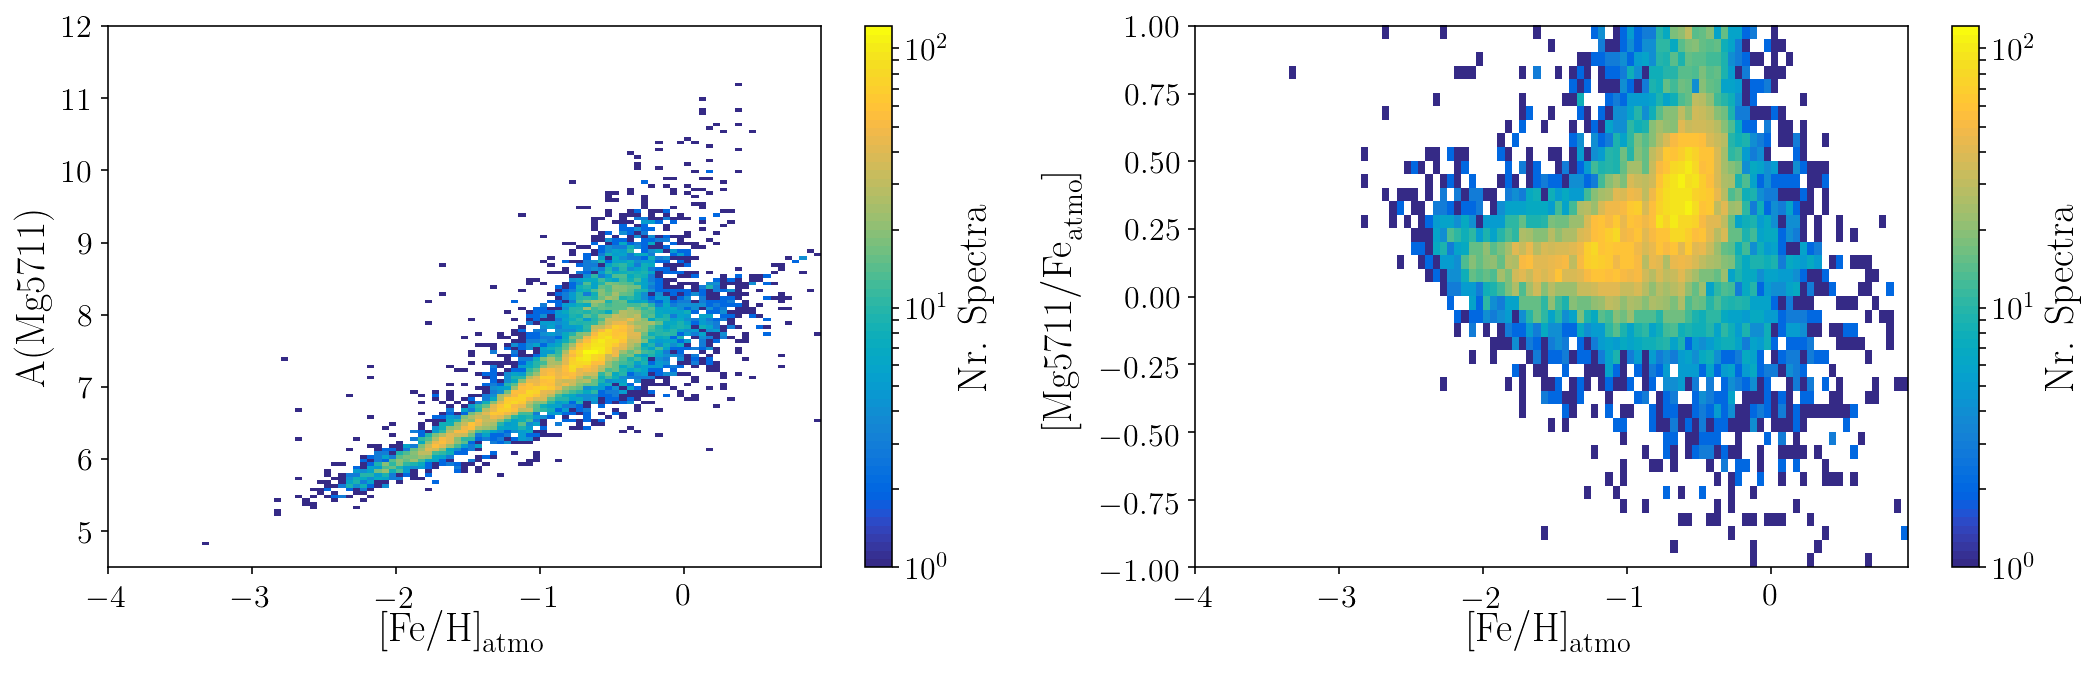

In [77]:
selection = (
    (np.abs(joined_subsets['e_teff']) > 0) & 
    (np.sqrt(
        (joined_subsets['rv_galah'])**2 + 
        (4.7623*joined_subsets['r_est']/1000.)**2 * 
         ((joined_subsets['pmra']*np.cos(joined_subsets['dec']*np.pi/180.))**2 + (joined_subsets['pmdec'])**2)
    ) > 180.) & 
    (joined_subsets['age'] > 5.) &
    (joined_subsets['flag_Mg5711'] == 0) &
    np.isfinite(joined_subsets_abund['A_Mg5711'])
)

print(len(joined_subsets[selection]))

plot_xfe(data=joined_subsets[selection], data_abund=joined_subsets_abund[selection], X = 'Mg5711',a_x_bins=np.arange(4.5,12.01,0.05))

## Ni5847

279018


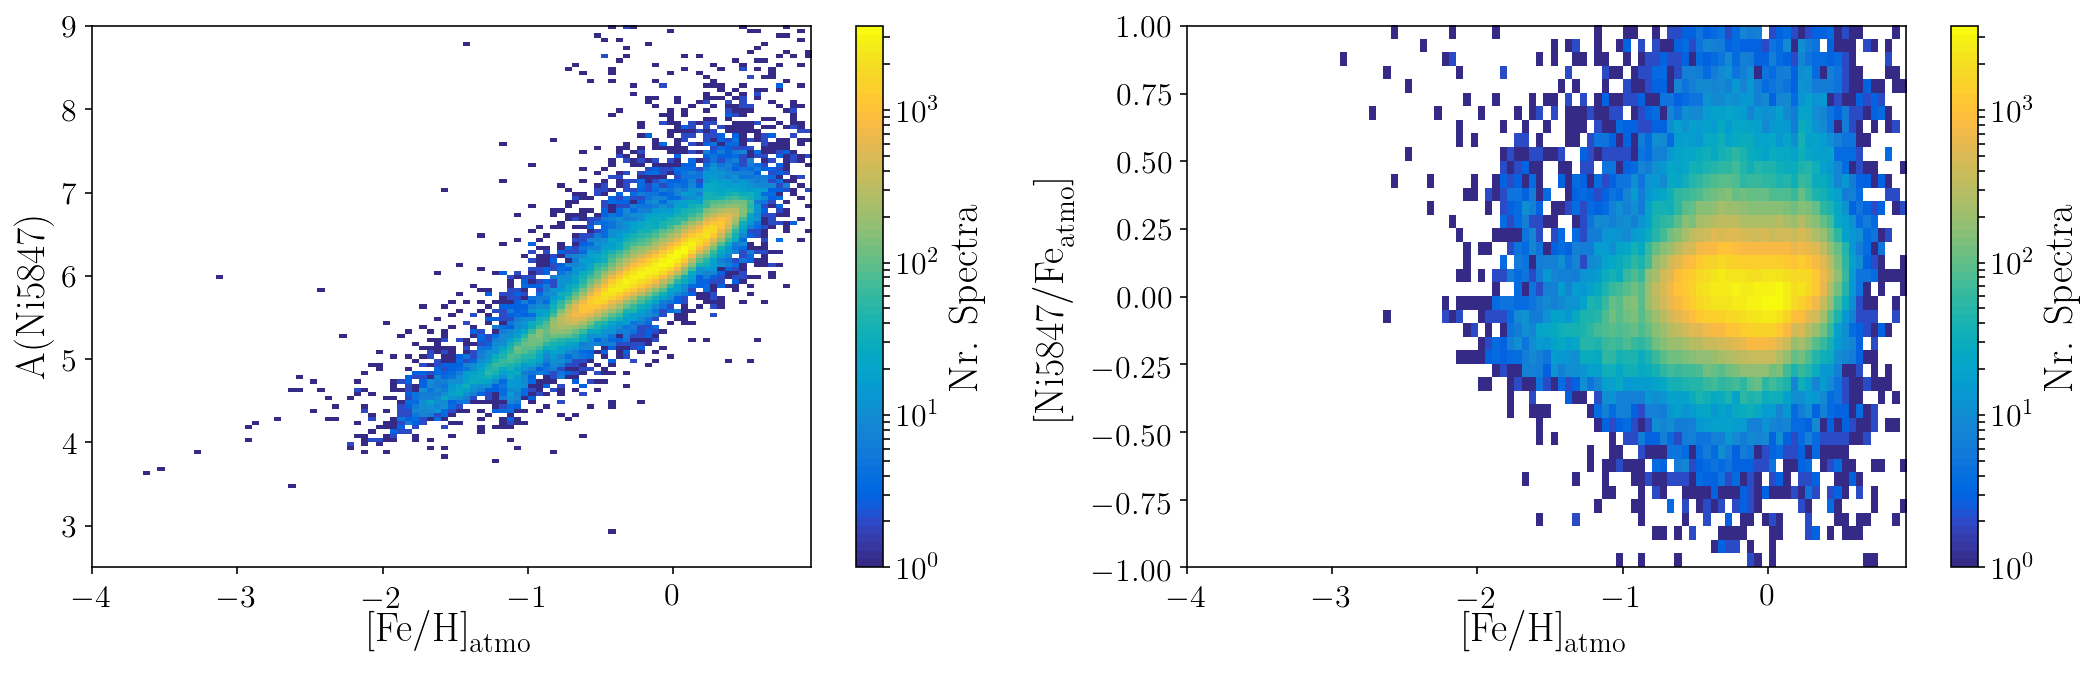

In [78]:
selection = (
    (np.abs(joined_subsets['e_teff']) > 0) &
    (joined_subsets['flag_Ni5847'] == 0) &
    np.isfinite(joined_subsets_abund['A_Ni5847'])
)

print(len(joined_subsets[selection]))

plot_xfe(data=joined_subsets[selection], data_abund=joined_subsets_abund[selection], X = 'Ni5847',a_x_bins=np.arange(2.5,9.01,0.05))

385381


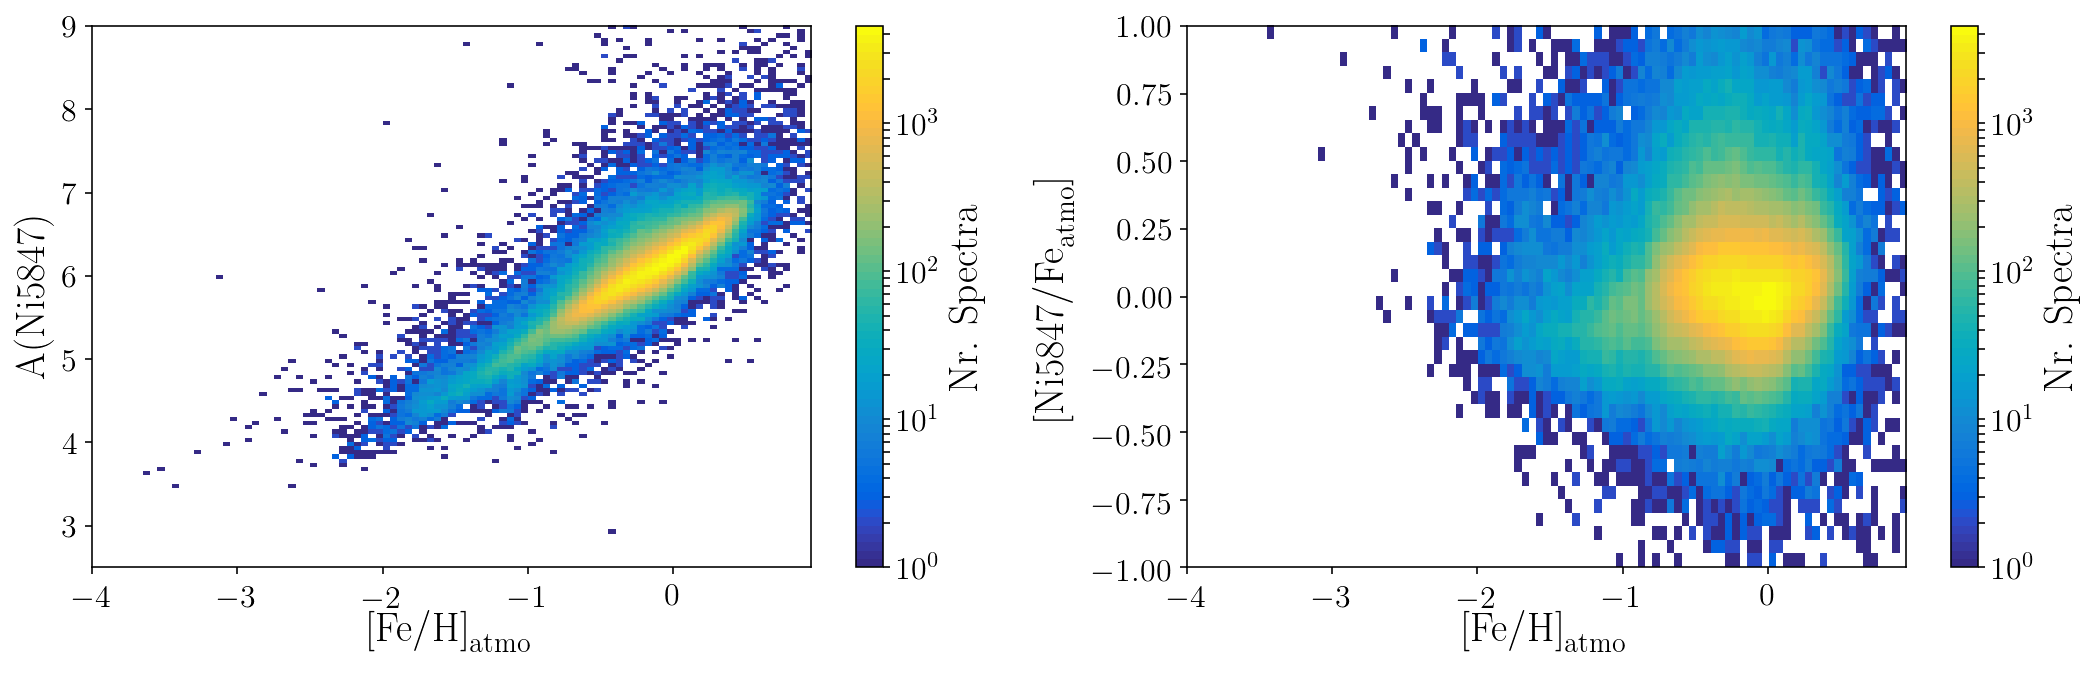

In [79]:
selection = (
    (np.abs(joined_subsets['e_teff']) > 0) &
    (joined_subsets['flag_Ni5847'] <= 1) &
    np.isfinite(joined_subsets_abund['A_Ni5847'])
)

print(len(joined_subsets[selection]))

plot_xfe(data=joined_subsets[selection], data_abund=joined_subsets_abund[selection], X = 'Ni5847',a_x_bins=np.arange(2.5,9.01,0.05))

12067


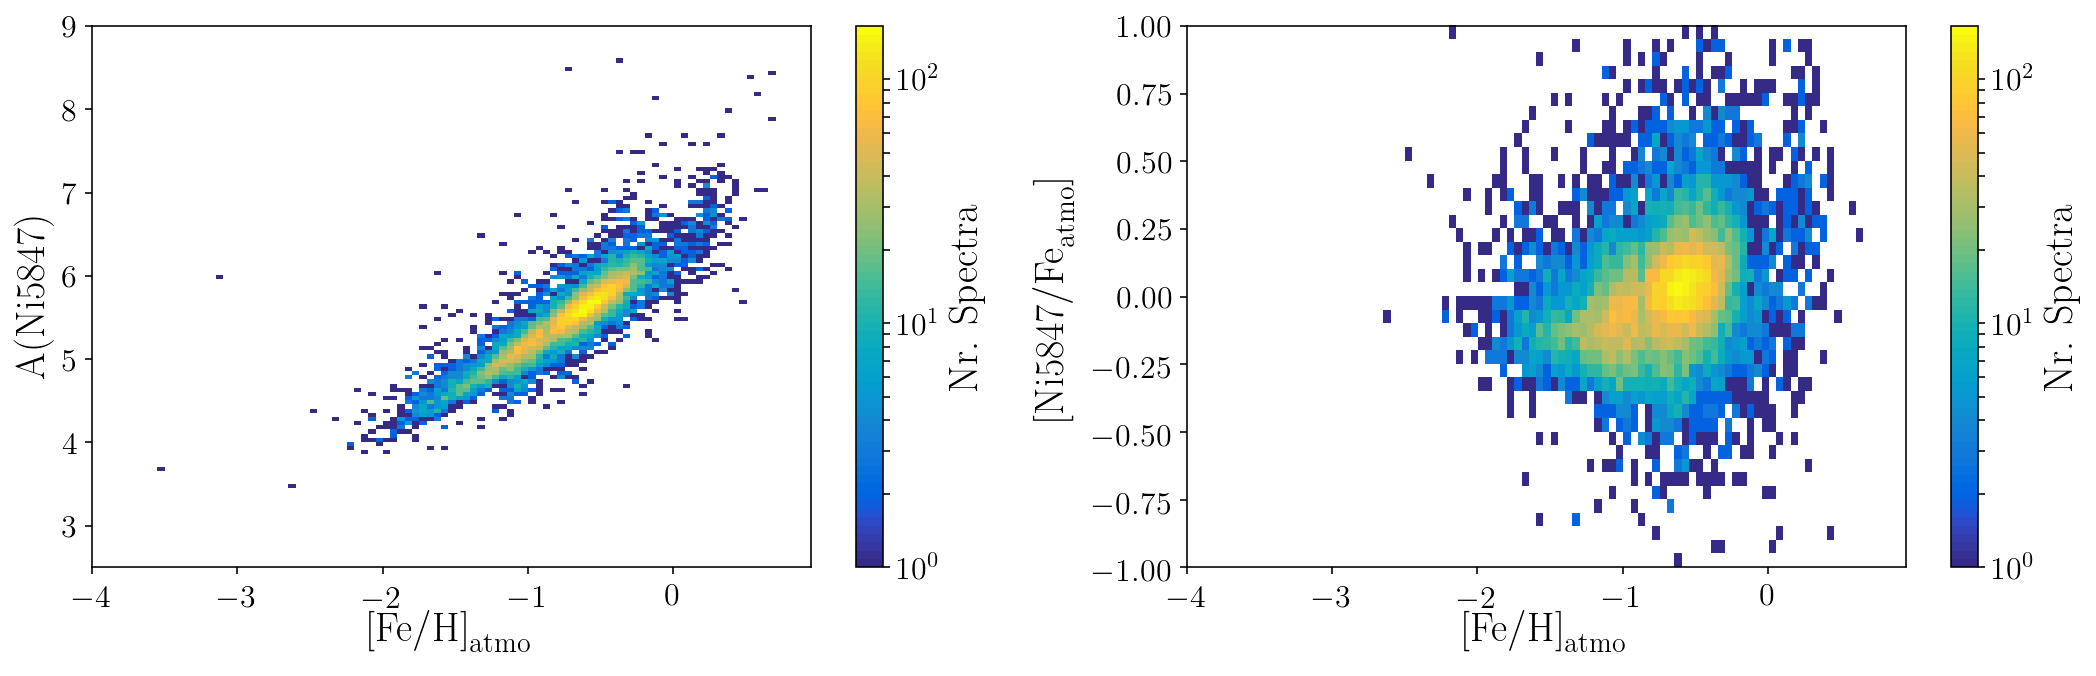

In [80]:
selection = (
    (np.abs(joined_subsets['e_teff']) > 0) & 
    (np.sqrt(
        (joined_subsets['rv_galah'])**2 + 
        (4.7623*joined_subsets['r_est']/1000.)**2 * 
         ((joined_subsets['pmra']*np.cos(joined_subsets['dec']*np.pi/180.))**2 + (joined_subsets['pmdec'])**2)
    ) > 180.) & 
    (joined_subsets['age'] > 5.) &
    (joined_subsets['flag_Ni5847'] == 0) &
    np.isfinite(joined_subsets_abund['A_Ni5847'])
)

print(len(joined_subsets[selection]))

plot_xfe(data=joined_subsets[selection], data_abund=joined_subsets_abund[selection], X = 'Ni5847',a_x_bins=np.arange(2.5,9.01,0.05))

## Cu5782

531559


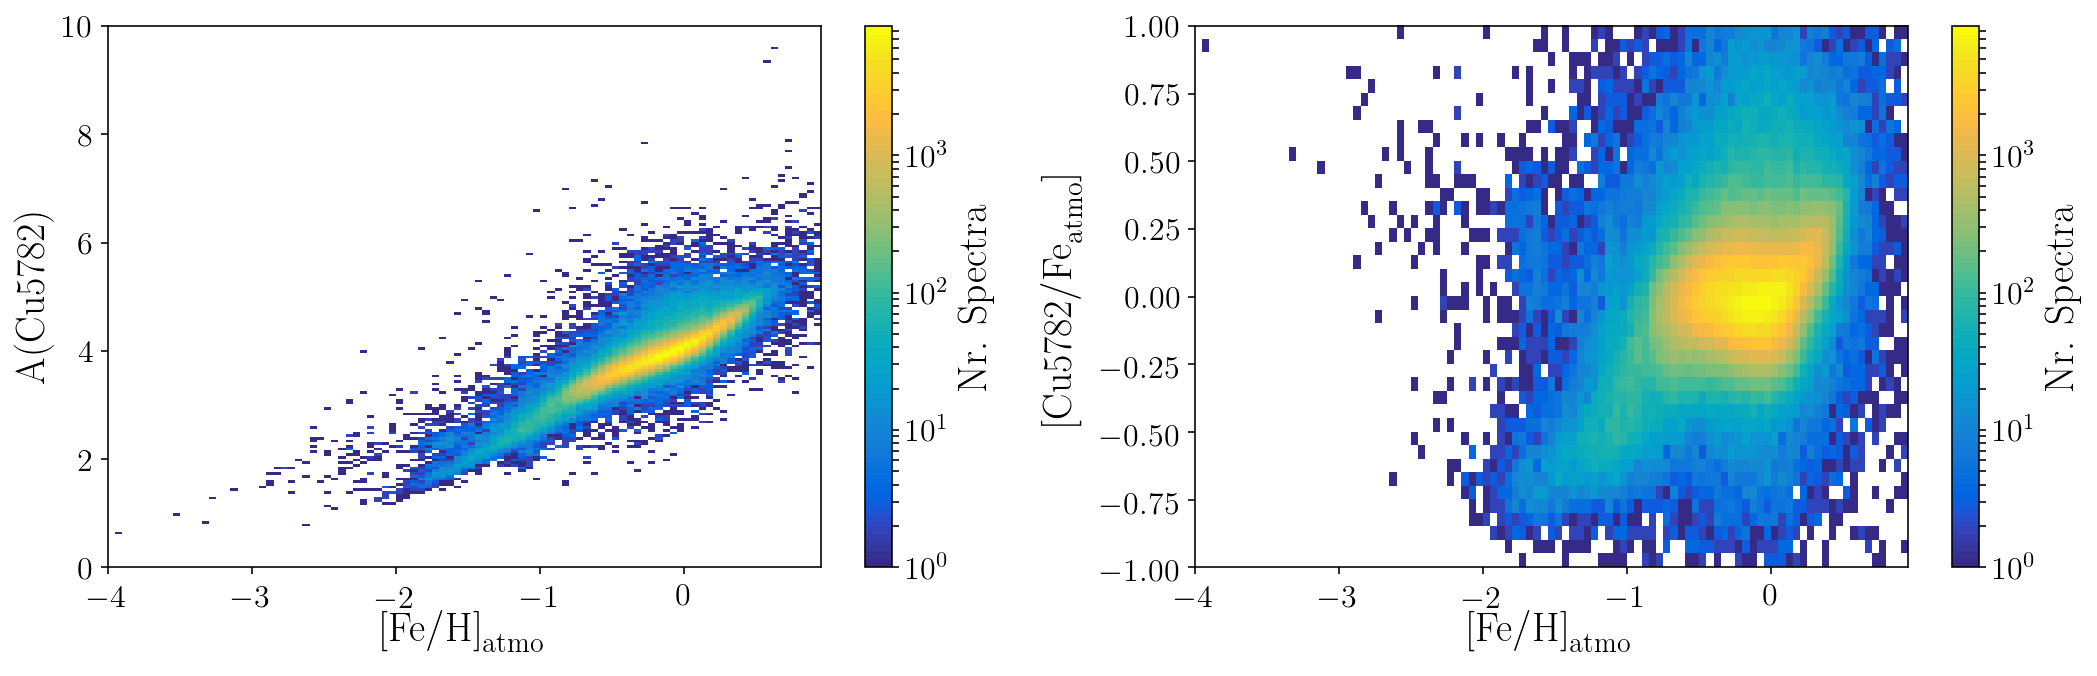

In [81]:
selection = (
    (np.abs(joined_subsets['e_teff']) > 0) &
    (joined_subsets['flag_Cu5782'] == 0) &
    np.isfinite(joined_subsets_abund['A_Cu5782'])
)

print(len(joined_subsets[selection]))

plot_xfe(data=joined_subsets[selection], data_abund=joined_subsets_abund[selection], X = 'Cu5782',a_x_bins=np.arange(0,10.01,0.05))

578546


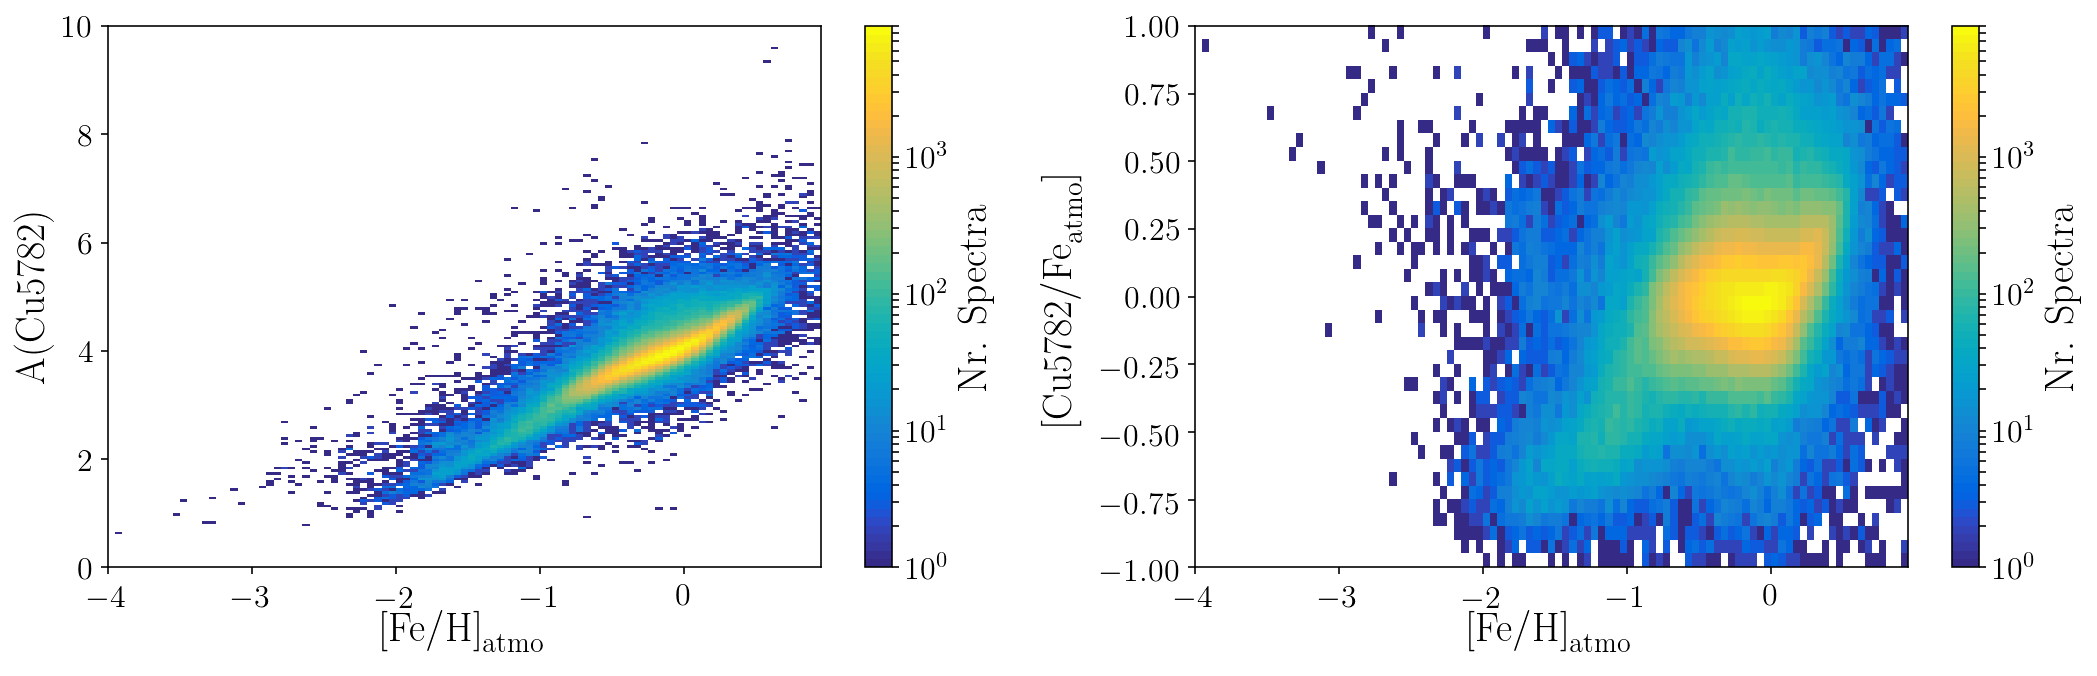

In [82]:
selection = (
    (np.abs(joined_subsets['e_teff']) > 0) &
    (joined_subsets['flag_Cu5782'] <= 1) &
    np.isfinite(joined_subsets_abund['A_Cu5782'])
)

print(len(joined_subsets[selection]))

plot_xfe(data=joined_subsets[selection], data_abund=joined_subsets_abund[selection], X = 'Cu5782',a_x_bins=np.arange(0,10.01,0.05))

16583


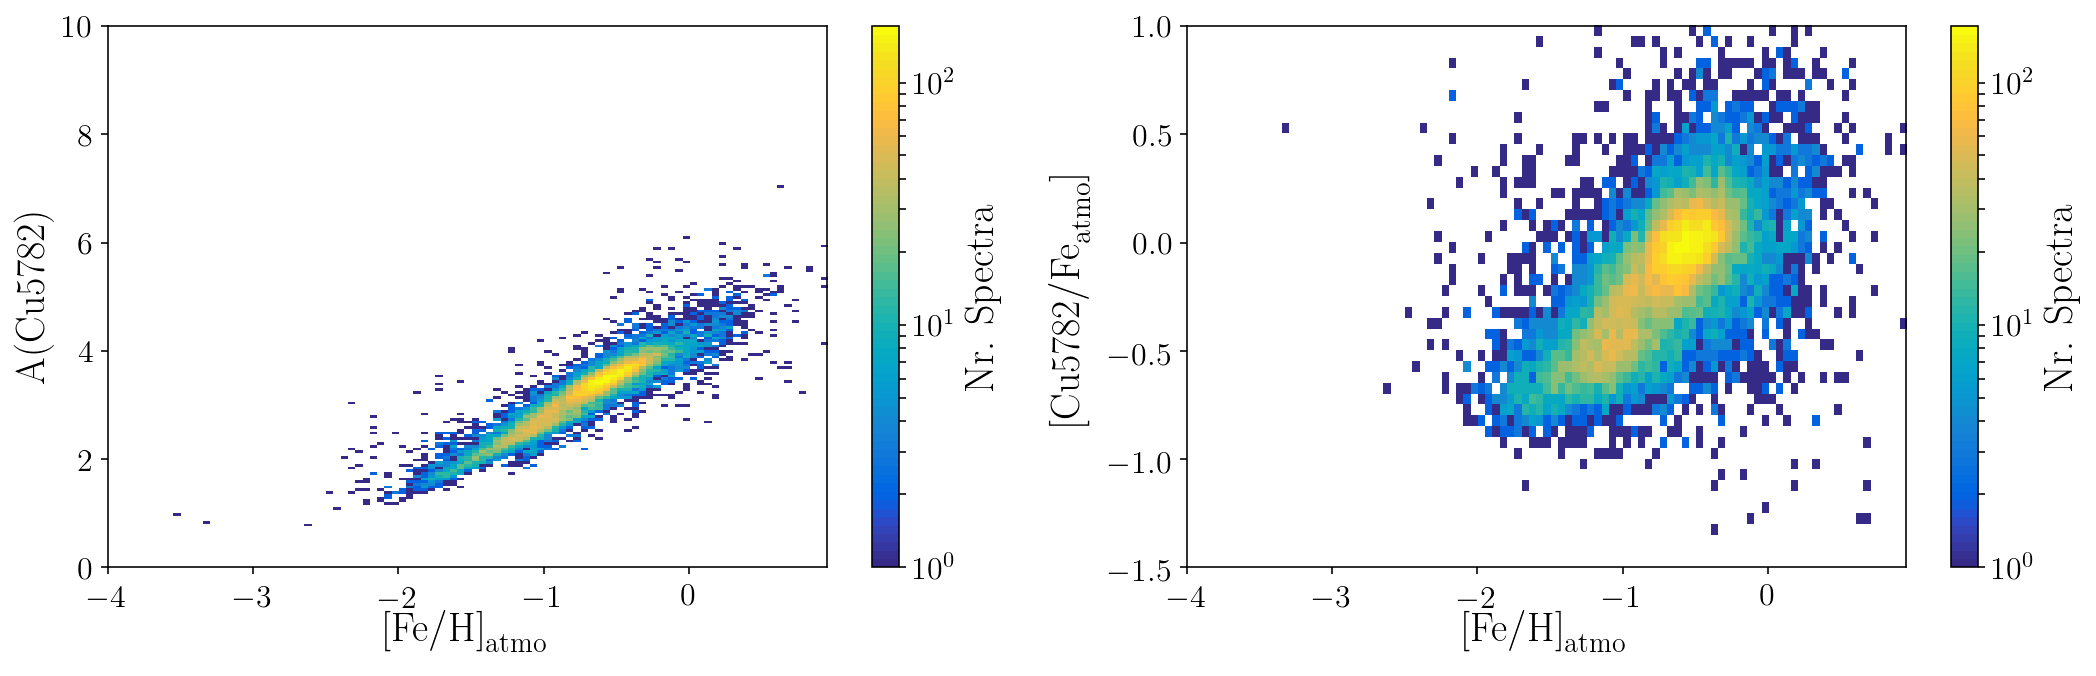

In [83]:
selection = (
    (np.abs(joined_subsets['e_teff']) > 0) & 
    (np.sqrt(
        (joined_subsets['rv_galah'])**2 + 
        (4.7623*joined_subsets['r_est']/1000.)**2 * 
         ((joined_subsets['pmra']*np.cos(joined_subsets['dec']*np.pi/180.))**2 + (joined_subsets['pmdec'])**2)
    ) > 180.) & 
    (joined_subsets['age'] > 5.) &
    (joined_subsets['flag_Cu5782'] == 0) &
    np.isfinite(joined_subsets_abund['A_Cu5782'])
)

print(len(joined_subsets[selection]))

plot_xfe(data=joined_subsets[selection], data_abund=joined_subsets_abund[selection], X = 'Cu5782',a_x_bins=np.arange(0,10.01,0.05),x_fe_bins=np.arange(-1.5,1.01,0.05))

## Eu6645

167558


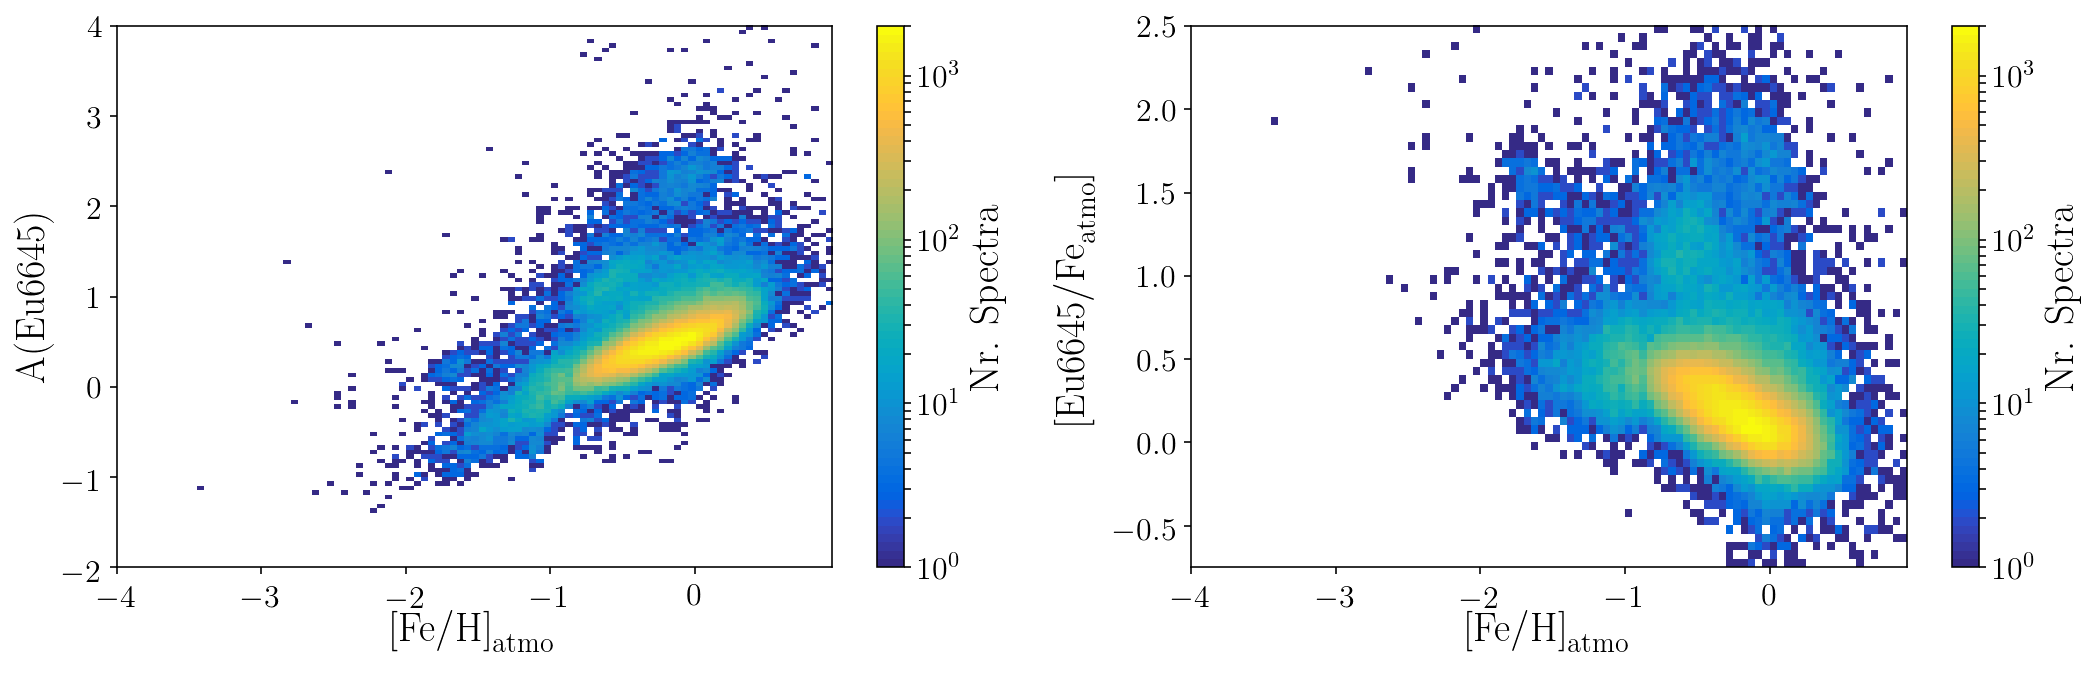

In [84]:
selection = (
    (np.abs(joined_subsets['e_teff']) > 0) &
    (joined_subsets['flag_Eu6645'] == 0) &
    np.isfinite(joined_subsets_abund['A_Eu6645'])
)

print(len(joined_subsets[selection]))

plot_xfe(data=joined_subsets[selection], data_abund=joined_subsets_abund[selection], X = 'Eu6645',a_x_bins=np.arange(-2.0,4.01,0.05),x_fe_bins=np.arange(-0.75,2.51,0.05))

267251


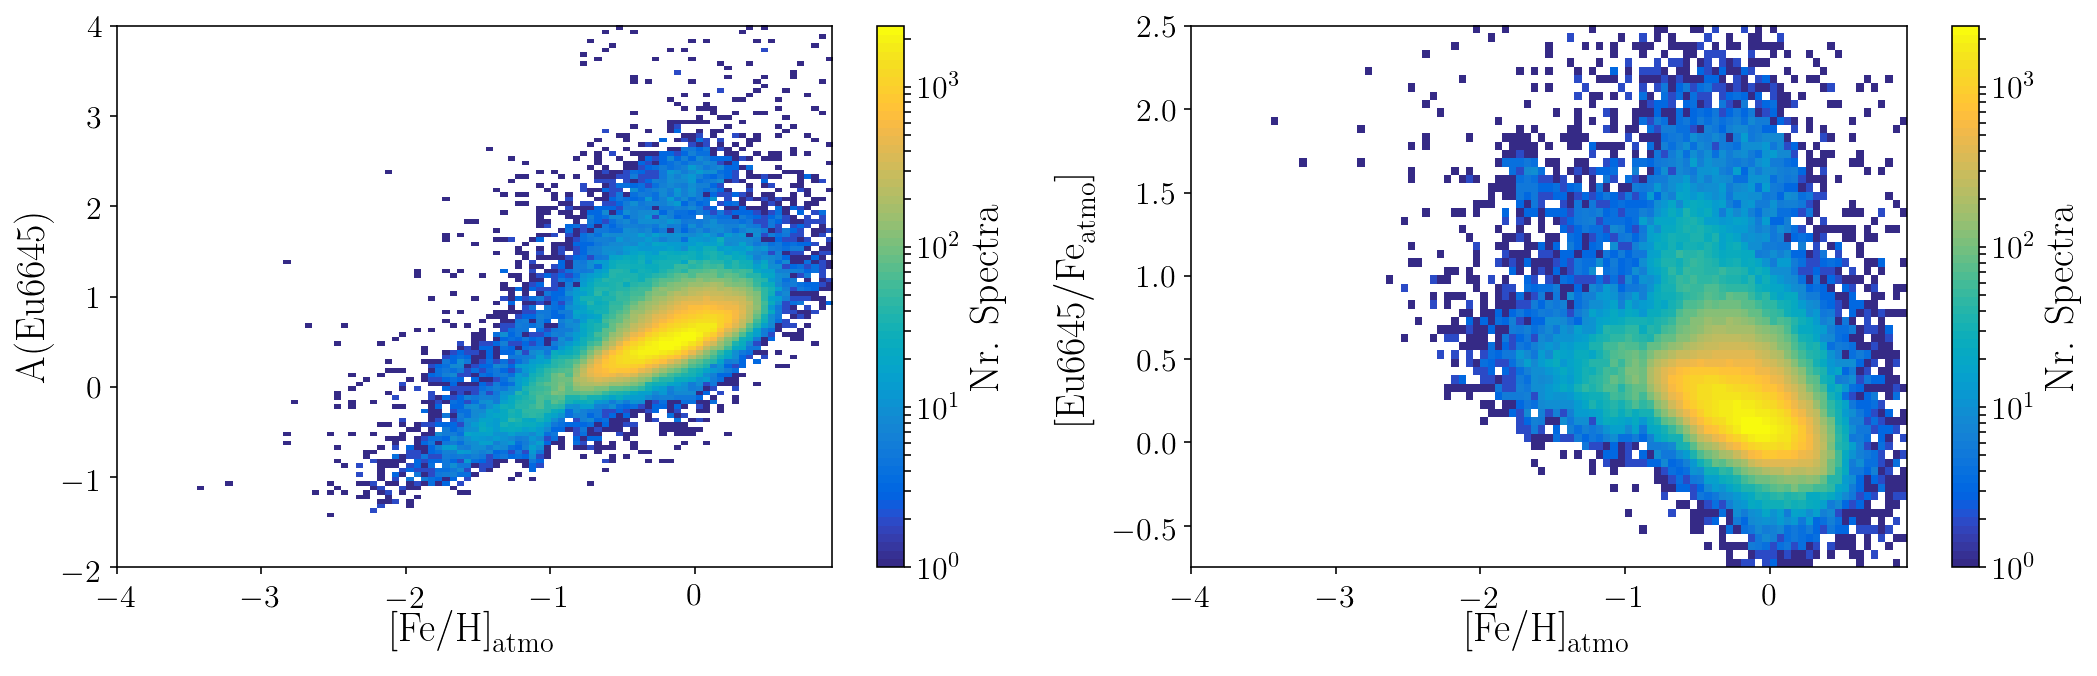

In [85]:
selection = (
    (np.abs(joined_subsets['e_teff']) > 0) &
    (joined_subsets['flag_Eu6645'] <= 1) &
    np.isfinite(joined_subsets_abund['A_Eu6645'])
)

print(len(joined_subsets[selection]))

plot_xfe(data=joined_subsets[selection], data_abund=joined_subsets_abund[selection], X = 'Eu6645',a_x_bins=np.arange(-2.0,4.01,0.05),x_fe_bins=np.arange(-0.75,2.51,0.05))

9837


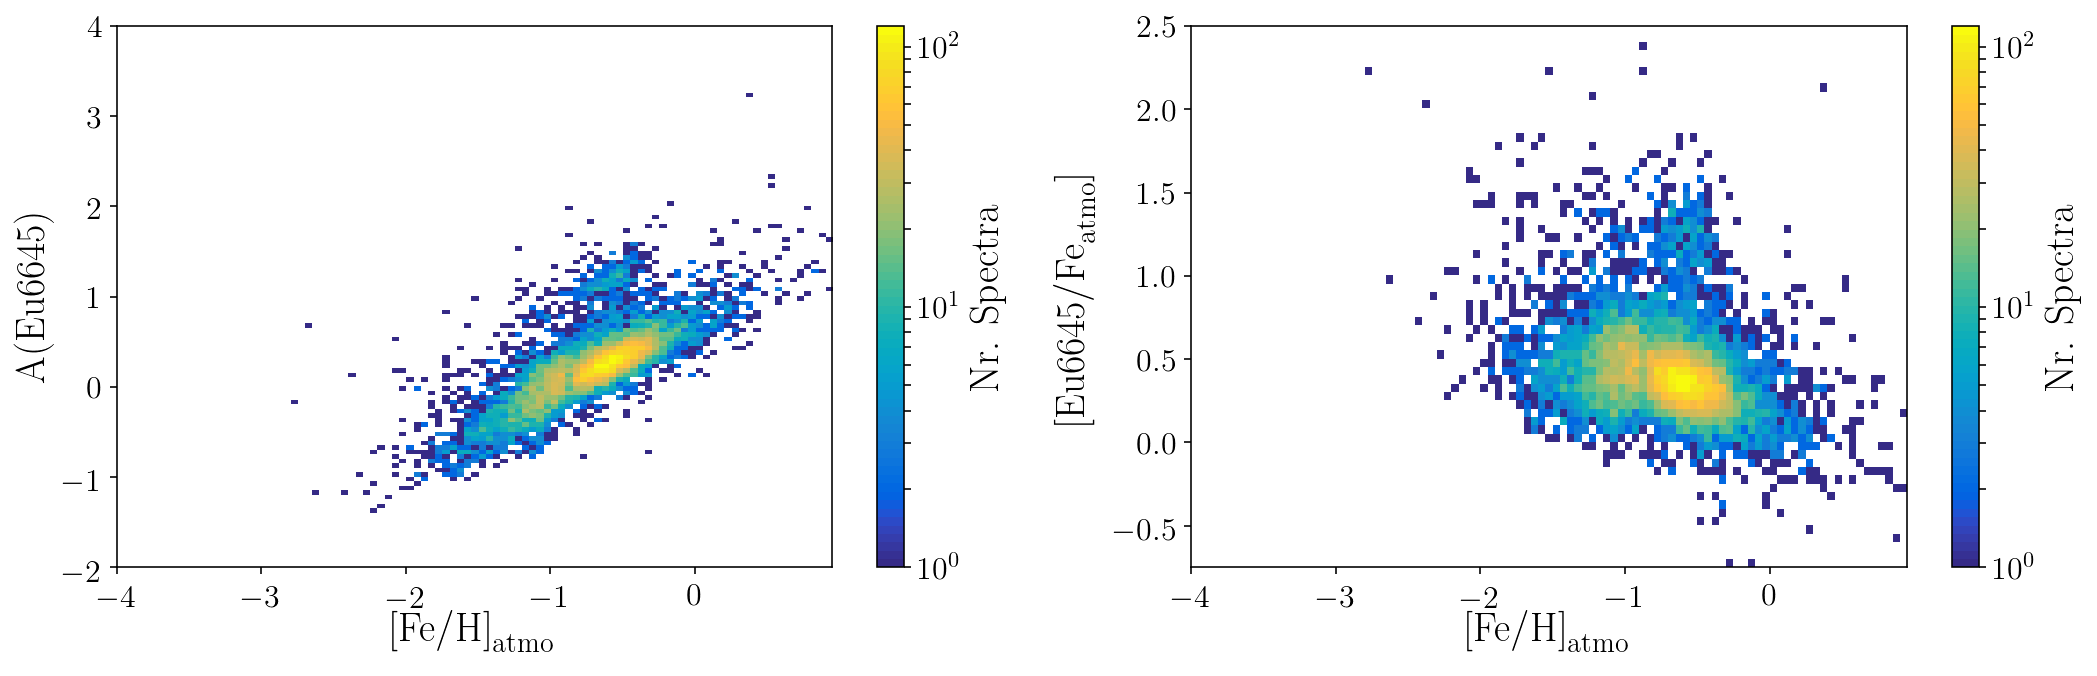

In [86]:
selection = (
    (np.abs(joined_subsets['e_teff']) > 0) & 
    (np.sqrt(
        (joined_subsets['rv_galah'])**2 + 
        (4.7623*joined_subsets['r_est']/1000.)**2 * 
         ((joined_subsets['pmra']*np.cos(joined_subsets['dec']*np.pi/180.))**2 + (joined_subsets['pmdec'])**2)
    ) > 180.) & 
    (joined_subsets['age'] > 5.) &
    (joined_subsets['flag_Eu6645'] == 0) &
    np.isfinite(joined_subsets_abund['A_Eu6645'])
)

print(len(joined_subsets[selection]))

plot_xfe(data=joined_subsets[selection], data_abund=joined_subsets_abund[selection], X = 'Eu6645',a_x_bins=np.arange(-2.0,4.01,0.05),x_fe_bins=np.arange(-0.75,2.51,0.05))

In [32]:
np.nanmedian(joined_subsets['chi2_sp']),np.nanmean(joined_subsets['chi2_sp'])

(0.74799752235412598, 15.361156)